# <center>Synthetic haplotypes and linkage disequilibrium</center>
### <center>Statistical Data Analysis for Applied Physics</center>
### <center>Riccardo Grandicelli</center>

## 1. Introduction

The DNA is a polymer that contains all the information needed for the development and functioning of an organism. DNA is made from repeating units called nucleotides, which are composed by a molecule of deoxyribose, a phosphate group and a nucleobase. There are four different types of nucleobases: cytosine (C), guanine (G), adenine (A) or thymine (T). All the information characterizing a living being is encoded in the sequence of these four bases.

The human genome has a length of almost 3.2 billion base pairs (bp, since the DNA is a double helix molecule and each base is always coupled with another one). However, any two copies of the human genome differ from one another only for almost the 0.1 % of this length. Many common diseases such as cardiovascular disease, diabetes and psychiatric illnesses are associated to genetic factors, so understanding these variations could help the diagnosis and treatment of these diseases.

Given a certain gene of the human genome, the variability between different human beings comes from small changes happening in certain positions. For example, at a certain position we could have a C for one individual and a A for another one. For a given position, we define *reference allele* the base or sequence of bases present in a genome chosen as a reference (the reference for the human genome is usually the GRCh38 genome), and *alternate allele* a base or sequence of bases that appears in some genomes and differs from the reference allele.

A *variant* is a combination of a reference allele and one alternate allele. Since we can have more than one alternate allele in the same position, then we can have more than one variant for each position. The most common type of variant is the single nucleotide polymorphism (SNP): it happens when both the reference and the alternate allele are composed of only one base. So, a SNP is just the substitution of one base at a certain position with another one. Other less common types of variants include, for example, indels, which are the insertion or deletion of one or more bases at a given position.

Variants can also be distinguished according to their frequency: a *rare variant* is a variant which is present in less than 1% of the genomes analyzed. On the contrary, a variant present in more than 1% of the genomes analyzed is called a *common variant*.

A useful resource to study variants in the human genome is the Genome Aggregation Database (gnomAD). It collects data coming from 76215 genomes and 730947 exomes (exome is the coding part of the genome, so it is a subset of the whole genome). For each observed variant the gnomAD dataset gives the frequency of that variant, i.e. the number of genomes in which that variant is present divided by the total number of observed genomes. Moreover, it also gives the frequencies of variants in ten different populations.

In this work, using the gnomAD database, we study how variants are structured in three different genes:
* HLA-DRB1: located in chromosome 6, it has variants associated to the risk of rheumatoid arthritis and multiple sclerosis
* TP53: located in chromosome 17, its variants are associated to cancer development
* ABO: located in chromosome 9, it is the gene that determines the blood group, and it has variants associated with increased risk of coronary artery disease

### 1.1 Linkage disequilibrium

A very interesting phenomena involving variants in the DNA is linkage disequilibrium (LD), which can be described as the nonrandom association of alleles at two different positions. A more precise definition can be obtained considering two positions A and B, both with a reference allele and one alternate allele (since LD is not defined if we have more than one variant in the same position). If we call $p(A)$ the probability of having the alternate allele at position A and $p(B)$ the probability of having the alternate allele at position B, then we can define the quantity
$$
\begin{equation*}
    D=p(A\cap B)-p(A)p(B)
\end{equation*}
$$
If $D\neq 0$ than we can say that the two positions are in linkage disequilibrium: the presence of the alternate allele at one position influences the presence of the alternate allele at the other position.

Often LD is measured using the $r^2$ coefficient, defined as
$$
\begin{equation*}
r^2=\frac{D^2}{p(A)p(B)(1-p(A))(1-p(B))}
\end{equation*}
$$
The quantity D can be either positive or negative: a negative value means that the alternate at one position is more often found with the reference at the other position. The $r^2$ coefficient, on the contrary, is always positive, meaning that we lose this kind of information. However, $r^2$ is useful to describe how the LD decays when we consider two distant positions.

To measure linkage disequilibrium we need to know the co-occurrence of variants in the same haplotype (a haplotype is a sequence of alleles along a chromosome). Unfortunately, real haplotypes data are really difficult to obtain, mainly due to privacy concerns. From the gnomAD dataset, for example, we can only know about the frequencies of variants, but we don't have information about the co-occurrence of these variants within the same haplotype.
  
One way to obtain this kind of information is through the data of the 1000 Genomes Project. This project reconstructed the genomes of 2504 individuals coming from different populations. However, 2504 individuals represent a small statistical sample, expecially considering that many variants have a frequency of less than $10^{-4}$, so they are likely absent in only $10^3$ genomes.

The reconstruction of LD from data coming from the 1000 Genomes Project is not the aim of this work, but we do it briefly in this section just to have a reference point about how a LD decay curve should look like. We consider only one population (Africans) and one gene (ABO), and we take only SNPs with a frequency of at least 1%.

We use datasets containing all the $r^2$ coefficients between all possible couples of variants:

In [1]:
install.packages("MCMCpack") #useful later for the Dirichlet distribution
library(MCMCpack)
library(tidyverse)

ld_ABO<-read_csv(
    "linkage_disequilibrium_csv/ABO_AFR_LD.csv"
)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: coda

Loading required package: MASS

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2026 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 31878 Columns: 8
── Column specification ──────

In [2]:
head(ld_ABO)

CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2,X8
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
9,133233766,rs75393246,9,133234122,rs113165541,0.22797000,NA
9,133233766,rs75393246,9,133234147,rs185803014,0.00135331,NA
9,133233766,rs75393246,9,133234304,rs181046008,0.00183014,NA
9,133233766,rs75393246,9,133234445,rs79429937,0.00392756,NA
9,133233766,rs75393246,9,133234465,rs140323151,0.00399633,NA
9,133233766,rs75393246,9,133234555,rs2027064,0.02546620,NA


"BP_A" and "BP_B" are the positions of the two variants, and the "R2" column is the LD coefficient $r^2$. These data have been obtained using the software PLINK. Details of the calculation of the LD coefficients from the 1000 Genomes Project data are provided a separate notebook (Supplementary Material).

Now we add a column for the distance between the two positions, and we consider the mean $r^2$ over intervals of 50 bp:

In [3]:
ld_decay_ABO<-ld_ABO %>%
  mutate(dist_bp=abs(BP_A - BP_B)) %>%        #create a column with the distance between positions
  mutate(dist_bin=as.integer(dist_bp/50)) %>% #divide the distances into bins of 50 bp
  arrange(desc(dist_bin)) %>%
  group_by(dist_bin) %>%
  summarise(R2_mean=mean(R2), chromosome=max(CHR_A)) #calculate the mean value of R2 for each bin

#fit to an exponential function with the nonlinear least square method
start_a <- max(ld_decay_ABO$R2_mean) #expected a is the highest value of R2
fit <- nls(
  R2_mean ~ a * exp(-dist_bin / lambda),
  data = ld_decay_ABO,
  algorithm="port",
  start = list(a = start_a, lambda = 20),
  lower = c(a = 0, lambda = 1e-6)
)

summary(fit)


Formula: R2_mean ~ a * exp(-dist_bin/lambda)

Parameters:
        Estimate Std. Error t value Pr(>|t|)    
a      9.378e-02  1.857e-03   50.50   <2e-16 ***
lambda 2.476e+02  7.084e+00   34.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0145 on 818 degrees of freedom

Algorithm "port", convergence message: relative convergence (4)


We can see that as the distance increases the LD coefficient for the ABO gene decays following an exponential function $a * exp(-d/\lambda)$. The two parameters $a=0.94$ and $\lambda=248 bp$ have been determined using the nonlinear least square method. The exponential decay can be better visualized through a plot:

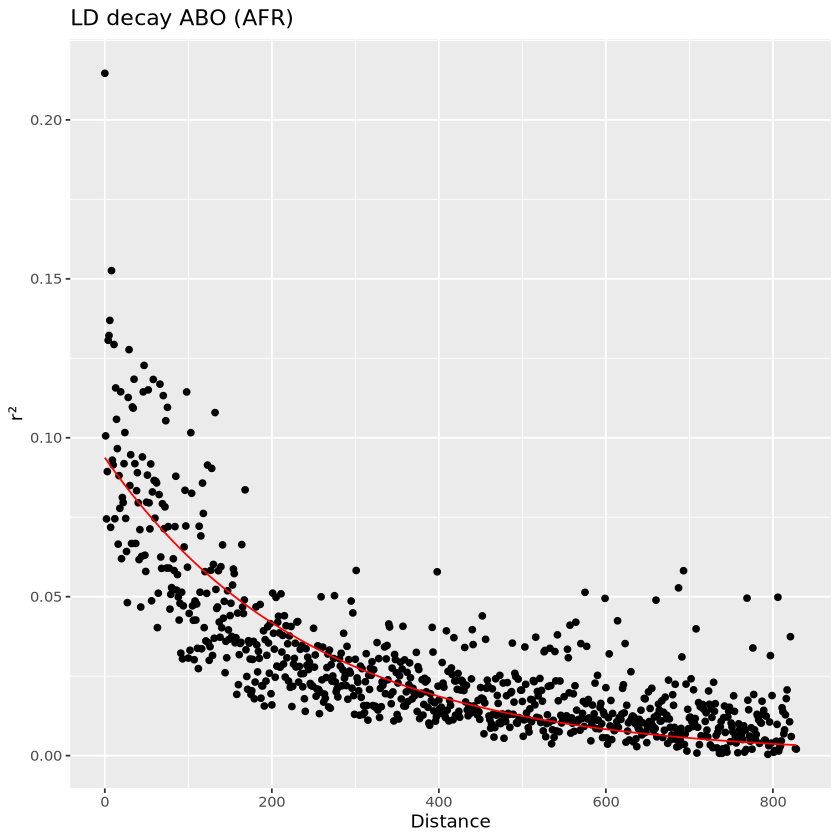

In [4]:
expected_R2<-predict(fit, ld_decay_ABO) #create the expected values of r2 following the exponential fit
ld_decay_ABO<-ld_decay_ABO %>%
  mutate(expected_R2=expected_R2)

#plot LD decay and exponential fit
ggplot(ld_decay_ABO, aes(x = dist_bin, y = R2_mean)) +
  geom_point() +
  geom_line(color="red", aes(y=expected_R2)) +
  labs(x = "Distance", y = "r²",
       title = "LD decay ABO (AFR)")

Since, as we said, real haplotypes are difficult to obtain, a possible alternative is to use synthetic haplotypes, i.e. haplotypes generated using allele frequency data. In this work we try to use data from gnomAD to generate synthetic haplotypes for the three genes HLA-DRB1, TP53 and ABO. The aim is to study the features of these synthetic haplotypes and to understand if they can be used to study linkage disequilibrium.

## 2. Data transformation

We begin the analysis by uploading and transforming data from the gnomAD dataset for the three genes HLA-DRB1, TP53 and ABO.

In [5]:
data_hla<-read_csv(
    "gnomad_datasets_csv/gnomAD_HLA-DRB1.csv"
)
data_tp<-read_csv(
    "gnomad_datasets_csv/gnomAD_TP53.csv"
)
data_abo<-read_csv(
    "gnomad_datasets_csv/gnomAD_ABO.csv"
)

Rows: 1200 Columns: 72
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): gnomAD ID, rsIDs, Reference, Alternate, Source, Filters - exomes, ...
dbl (56): Chromosome, Position, ClinVar Variation ID, Allele Count, Allele N...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2041 Columns: 72
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): gnomAD ID, rsIDs, Reference, Alternate, Source, Filters - exomes, ...
dbl (56): Chromosome, Position, ClinVar Variation ID, Allele Count, Allele N...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1804 Columns: 72
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): gno

Since it is easier to have a single dataset, we merge data for the three genes. When we will need to separate data for the three genes, we will filter on the chromosome number (which is 6 for HLA_DRB1, 9 for ABO and 17 for TP53).

In [6]:
data_gnomad<-bind_rows(data_hla, data_tp, data_abo)
stopifnot(nrow(data_gnomad)==nrow(data_tp) + nrow(data_abo) + nrow(data_hla))

Data are already in a tidy format. So, we only have to change the name of the columns and to add some columns for the allele frequencies for each population.

In [7]:
data_gnomad<-data_gnomad %>%
    set_names(
        ~str_to_lower(.) %>%            #remove capital letters
        str_replace_all(" - ", "_") %>% 
        str_replace_all(" ", "_") %>%
        str_replace_all("-", "_") %>%
        str_replace_all("\\(", "") %>%
        str_replace_all("\\)", "") %>%
        str_replace_all("/african_american", "") #with african we mean both african and african-american
    )

    #allele_frequency=allele_count/allele_number for each population
data_gnomad<-data_gnomad %>%
    mutate(
        allele_frequency_african=allele_count_african/allele_number_african,
        allele_frequency_east_asian=allele_count_east_asian/allele_number_east_asian,
        allele_frequency_admixed_american=allele_count_admixed_american/allele_number_admixed_american,
        allele_frequency_ashkenazi_jewish=allele_count_ashkenazi_jewish/allele_number_ashkenazi_jewish,
        allele_frequency_european_finnish=allele_count_european_finnish/allele_number_european_finnish,
        allele_frequency_middle_eastern=allele_count_middle_eastern/allele_number_middle_eastern,
        allele_frequency_european_non_finnish=allele_count_european_non_finnish/allele_number_european_non_finnish,
        allele_frequency_amish=allele_count_amish/allele_number_amish,
        allele_frequency_south_asian=allele_count_south_asian/allele_number_south_asian,
        allele_frequency_remaining=allele_count_remaining/allele_number_remaining
        
    )
colnames(data_gnomad)

[1] "gnomad_id"                            
 [2] "chromosome"                           
 [3] "position"                             
 [4] "rsids"                                
 [5] "reference"                            
 [6] "alternate"                            
 [7] "source"                               
 [8] "filters_exomes"                       
 [9] "filters_genomes"                      
[10] "transcript"                           
[11] "hgvs_consequence"                     
[12] "protein_consequence"                  
[13] "transcript_consequence"               
[14] "vep_annotation"                       
[15] "clinvar_germline_classification"      
[16] "clinvar_variation_id"                 
[17] "flags"                                
[18] "allele_count"                         
[19] "allele_number"                        
[20] "allele_frequency"                     
[21] "homozygote_count"                     
[22] "hemizygote_count"                     
[23] "filters_joint"                        
[24] "groupmax_faf_group"                   
[25] "groupmax_faf_frequency"               
[26] "cadd"                                 
[27] "revel_max"                            
[28] "spliceai_ds_max"                      
[29] "pangolin_largest_ds"                  
[30] "phylop"                               
[31] "sift_max"                             
[32] "polyphen_max"                         
[33] "allele_count_african"                 
[34] "allele_number_african"                
[35] "homozygote_count_african"             
[36] "hemizygote_count_african"             
[37] "allele_count_admixed_american"        
[38] "allele_number_admixed_american"       
[39] "homozygote_count_admixed_american"    
[40] "hemizygote_count_admixed_american"    
[41] "allele_count_ashkenazi_jewish"        
[42] "allele_number_ashkenazi_jewish"       
[43] "homozygote_count_ashkenazi_jewish"    
[44] "hemizygote_count_ashkenazi_jewish"    
[45] "allele_count_east_asian"              
[46] "allele_number_east_asian"             
[47] "homozygote_count_east_asian"          
[48] "hemizygote_count_east_asian"          
[49] "allele_count_european_finnish"        
[50] "allele_number_european_finnish"       
[51] "homozygote_count_european_finnish"    
[52] "hemizygote_count_european_finnish"    
[53] "allele_count_middle_eastern"          
[54] "allele_number_middle_eastern"         
[55] "homozygote_count_middle_eastern"      
[56] "hemizygote_count_middle_eastern"      
[57] "allele_count_european_non_finnish"    
[58] "allele_number_european_non_finnish"   
[59] "homozygote_count_european_non_finnish"
[60] "hemizygote_count_european_non_finnish"
[61] "allele_count_amish"                   
[62] "allele_number_amish"                  
[63] "homozygote_count_amish"               
[64] "hemizygote_count_amish"               
[65] "allele_count_south_asian"             
[66] "allele_number_south_asian"            
[67] "homozygote_count_south_asian"         
[68] "hemizygote_count_south_asian"         
[69] "allele_count_remaining"               
[70] "allele_number_remaining"              
[71] "homozygote_count_remaining"           
[72] "hemizygote_count_remaining"           
[73] "allele_frequency_african"             
[74] "allele_frequency_east_asian"          
[75] "allele_frequency_admixed_american"    
[76] "allele_frequency_ashkenazi_jewish"    
[77] "allele_frequency_european_finnish"    
[78] "allele_frequency_middle_eastern"      
[79] "allele_frequency_european_non_finnish"
[80] "allele_frequency_amish"               
[81] "allele_frequency_south_asian"         
[82] "allele_frequency_remaining"

### 2.1 SNPs and other variants

Almost all variants present in the gnomAD database are SNPs. However, we have also other types of variants, such as for example indels. The issue with these variants different from SNPs is that their representation in the dataset is ambigous: sometimes more variants represent the same mutation. This becomes clearer considering for example variants at position 7674360 in the TP53 gene:

In [8]:
data_gnomad %>%
    filter(position==7674360) %>%
    select(position, chromosome, reference, alternate, allele_number, allele_count, allele_frequency)

position,chromosome,reference,alternate,allele_number,allele_count,allele_frequency
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
7674360,17,C,CTTT,692388,31,4.477258e-05
7674360,17,C,CTTTTT,692148,1,1.444778e-06
7674360,17,C,CT,682916,27932,4.090108e-02
7674360,17,CT,C,629768,152627,2.423543e-01
7674360,17,C,CTT,691188,516,7.465407e-04
7674360,17,CTTTTTT,C,692144,3,4.334358e-06
7674360,17,CTTTT,C,691118,280,4.051407e-04
7674360,17,CTT,C,660940,13142,1.988380e-02
7674360,17,CTTTTT,C,692022,18,2.601073e-05


We have 12 possible variants for this position, but almost all of them represent the same mutation, which is the insertion or deletion of one or more T after C. We are not even sure that the number of T changes from one variant to the other: sometimes these differences depend only on the way data have been collected.

Since our main interest is in SNPs, but we also want to keep some of the other variants, we filter the dataset according to a rule: for each position we keep all the SNPs and only the non-SNP variant with the highest frequency.

In [9]:
nrow(data_gnomad)

[1] 5045

In [10]:
data_non_SNP_to_keep<-data_gnomad %>%
    filter(nchar(reference)!=1 | nchar(alternate)!=1) %>% #keep only the non-SNP
    group_by(position) %>%
    slice_max(allele_frequency, n=1) #keep only the non-SNP with highest frequency

elements_to_keep<-data_non_SNP_to_keep$gnomad_id #select the gnomad_id of the non-SNP we want to keep

data_gnomad<-data_gnomad %>%
    filter((nchar(reference)==1 & nchar(alternate)==1) | gnomad_id %in% elements_to_keep)
#so we keep only SNPs and for each position the non-SNP with highest frequency

In [11]:
nrow(data_gnomad)

[1] 4913

As we can see, this operation eliminates 132 rows, which is just 2.5% of the variants for the three genes. So we don't lose much information.

This is the dataset we will use for the analysis in the next section. Sometimes, however, we will study separately common variants and rare variants. So, we create two datasets, one containing only the common variants and the other only the rare variants:

In [12]:
data_gnomad_common_variants<-data_gnomad %>%
    filter(allele_frequency>=0.01)
data_gnomad_rare_variants<-data_gnomad %>%
    filter(allele_frequency<0.01)

## 3. Variant structure in real data

In this section we analyse how the variants and their frequencies are distributed across the gene, and study how they differ between different populations.

### 3.1 Distribution of variants across the genes

First, we study how distances between variants are distributed across the three genes. To do so, we have to add a column to the dataset specifying the distance of a variant from the previous one:

In [13]:
distance_vector<-rep(0, nrow(data_gnomad)) 
distance_vector[1]<-1234567 #the first element has no meaning, see later
for (i in 1:(nrow(data_gnomad)-1)){
    distance_vector[i+1]<-data_gnomad$position[i+1]-data_gnomad$position[i] #distance between variants
}
data_gnomad<-data_gnomad %>%
    mutate(dist_from_previous_variant=distance_vector)
unique(data_gnomad$dist_from_previous_variant)

[1]   1234567         1         0         2         4         7         3
 [8]         5         6         9      1001        15         8        12
[15]        13       329       553      2130        11      5121 -24927934
[22]        17        10        16      4054       785        22        18
[29]      2040       769      2357        53       196       420       608
[36]        14 125556827        21        19     21853       903       406
[43]      1537      1306       575     12844

The value 0 means that we have two or more possible variants for the same position. The biggest values in modulus (-24927934 and 125556827, and 1234567 added manually) mean that we are changing gene. They are associated to the first variant of each gene, and they are meaningless since we don't have any variant before. So, we have to remove them before plotting an histogram of the distances.

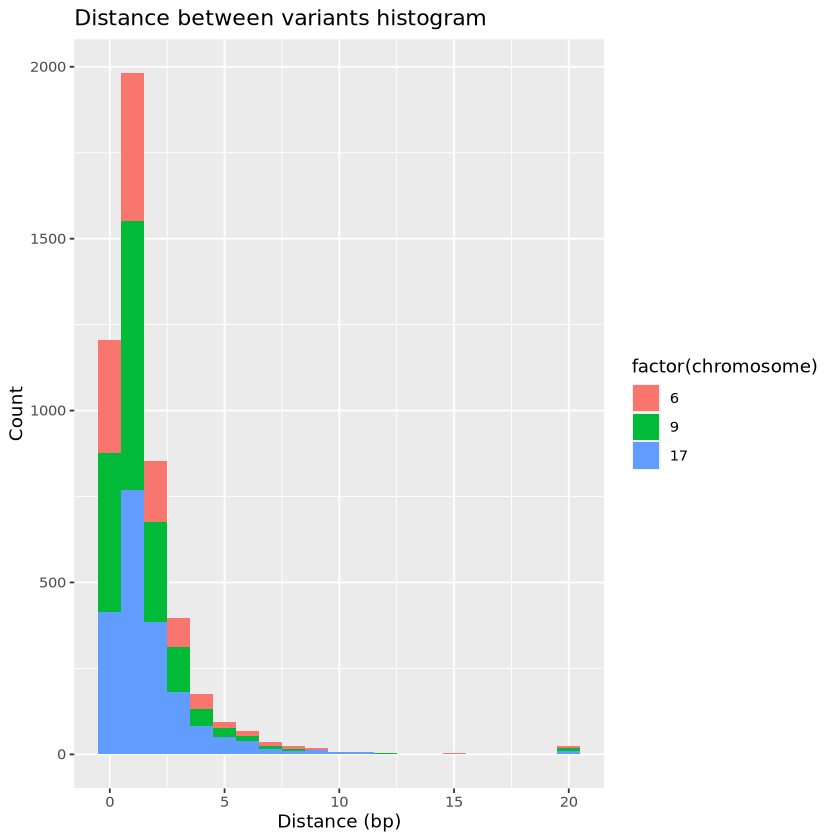

In [14]:
data_histogram_distance<-data_gnomad %>%
    select(dist_from_previous_variant, chromosome) %>%
    filter(abs(dist_from_previous_variant)<100000) %>% #remove the distance value for the initial position of each gene
    mutate(dist_cap=pmin(dist_from_previous_variant, 20))
    #distances higher than 20 bp have been collected in the last bin for better visualization
    
ggplot(data=data_histogram_distance, aes(x=dist_cap, fill=factor(chromosome))) +
    geom_histogram(bins=21) + #one bin for each value of the distance from 0 to 20
    labs(title = "Distance between variants histogram",
       x = "Distance (bp)",
       y = "Count")

In [15]:
nrow(data_histogram_distance %>% filter(dist_from_previous_variant==0))

[1] 1206

The histogram shows that almost all the distances between consecutive variants are no bigger than 10 bp. This means that variants in all the three genes are very frequent, and we have only a limited number of long regions for which no variant has been observed. We can also notice that the bin 0 has a count of 1206, meaning that we have many positions with more than one variant.

We can better visualize the same data using a boxplot: it clearly shows that more than 75% of the distances are between 0 and 2 bp.

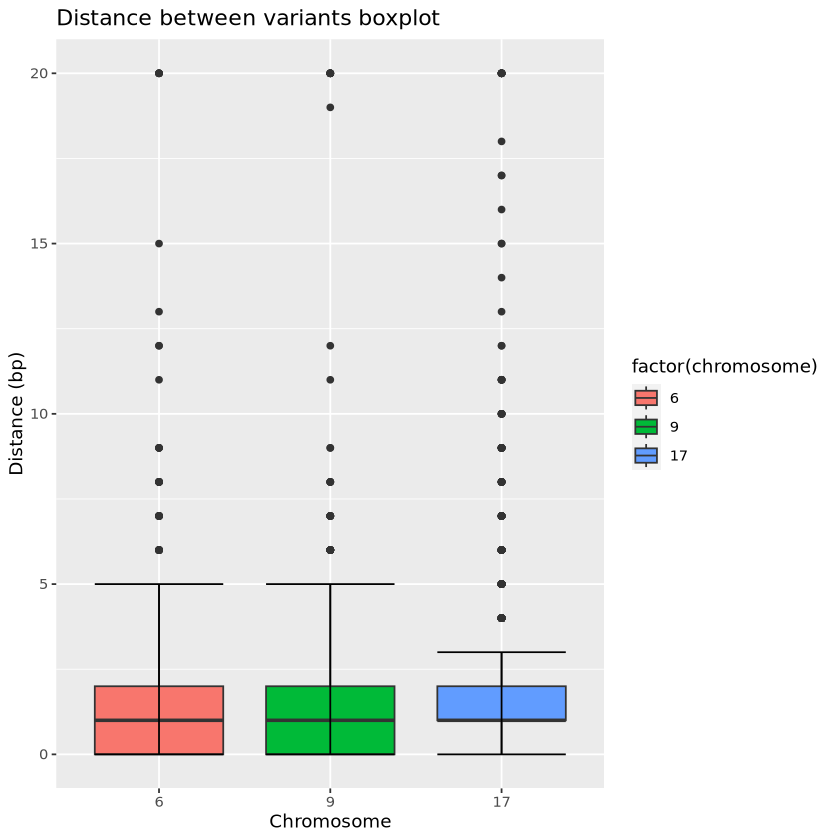

In [16]:
ggplot(data=data_histogram_distance, aes(x=factor(chromosome), y=dist_cap, fill=factor(chromosome))) +
    geom_boxplot() +
    stat_boxplot( geom = "errorbar" ) +
    labs(title = "Distance between variants boxplot",
       x = "Chromosome",
       y = "Distance (bp)")

If we remove rare variants, we can see that almost all common variants are located in the gene HLA-DRB1. This is interesting, since this gene is the one with the smallest number of variants between the three genes, but it has by far the highest number of common variants.

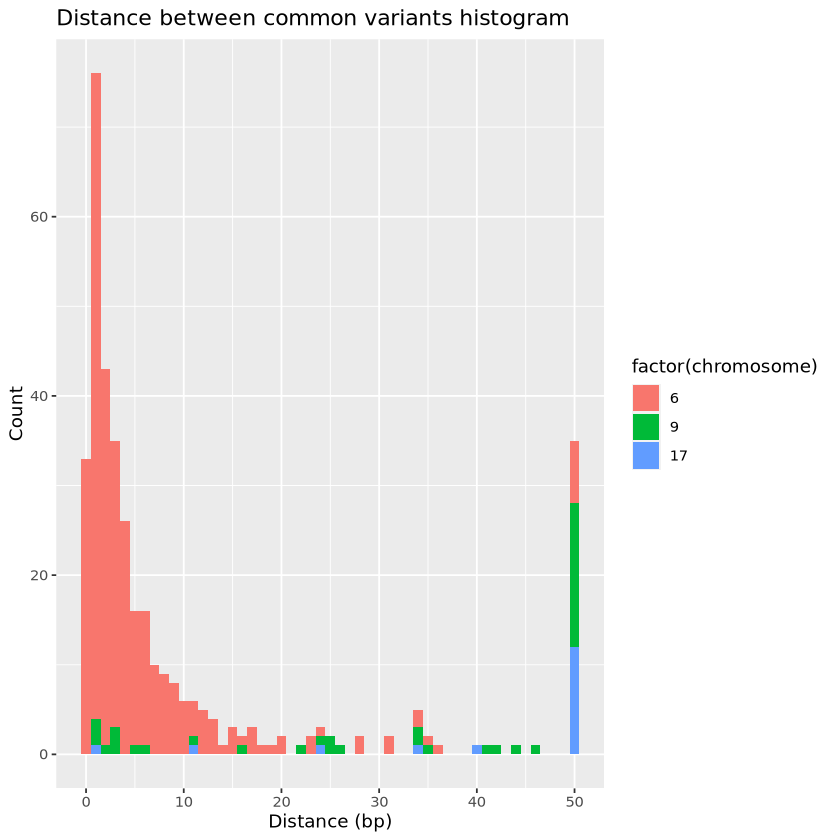

In [17]:
#this is the same code as before but applied on the dataset with only common variants:
#we add the distance from previous variants and then plot the histogram of the distances

distance_vector<-rep(0, nrow(data_gnomad_common_variants)) 
distance_vector[1]<-1234567
for (i in 1:(nrow(data_gnomad_common_variants)-1)){
    distance_vector[i+1]<-data_gnomad_common_variants$position[i+1]-data_gnomad_common_variants$position[i]
}

data_gnomad_common_variants<-data_gnomad_common_variants %>%
    mutate(dist_from_previous_variant=distance_vector)

data_histogram_distance_common_variants<-data_gnomad_common_variants %>%
    select(dist_from_previous_variant, chromosome) %>%
    filter(abs(dist_from_previous_variant)<100000) %>% #remove the distance value for the initial position of each gene
    mutate(dist_cap=pmin(dist_from_previous_variant, 50))
    #in this case we keep distances up to 50

ggplot(data=data_histogram_distance_common_variants, aes(x=dist_cap, fill=factor(chromosome))) +
    geom_histogram(bins=51) + #one bin for each value of the distance from 0 to 50
    labs(title = "Distance between common variants histogram",
       x = "Distance (bp)",
       y = "Count")

In [18]:
#comparison between the total number of variants and the number of common variants in each gene
data_gnomad %>%
    group_by(chromosome) %>%
    summarize(count=n())

data_gnomad_common_variants %>%
    group_by(chromosome) %>%
    summarize(count=n())

chromosome,count
<dbl>,<int>
6,1137
9,1782
17,1994


chromosome,count
<dbl>,<int>
6,312
9,40
17,18


All these plots do not give any information about how the variants are distributed in the genes. So, we divide each gene into subregions of 1000 bp, and we count the number of variants for each subregion.

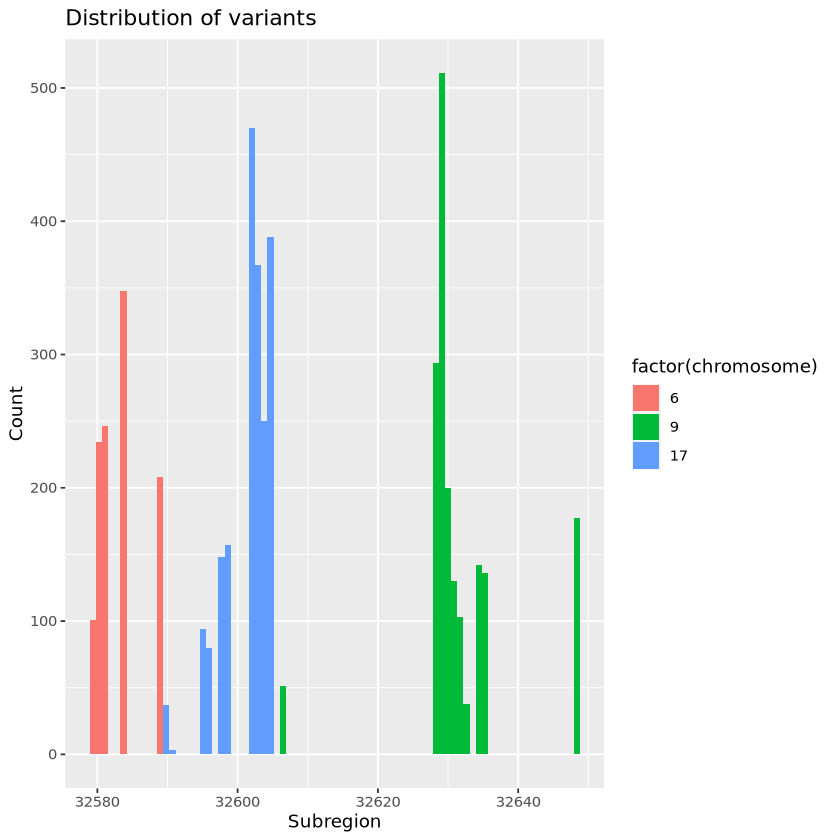

In [19]:
data_variants_distribution<-data_gnomad %>%
    mutate(dist_from_previous_variant=ifelse(abs(dist_from_previous_variant)>100000, 0, dist_from_previous_variant)) %>%
    mutate(rescaled_position=cumsum(dist_from_previous_variant)) %>%
    mutate(rescaled_position=rescaled_position+position[1]) %>%
    #these transformations are done just to have the three genes on the same histogram, one next to the other

    mutate(window=as.integer(rescaled_position/1000)) %>% #create 1000 bp windows
    mutate(window=ifelse(chromosome==17, window+1, window)) %>% #separate bins for each gene
    mutate(window=ifelse(chromosome==9, window+2, window))

ggplot(data=data_variants_distribution, aes(x=window, fill=factor(chromosome))) +
    geom_histogram(bins=80) + 
    labs(title = "Distribution of variants",
       x = "Subregion",
       y = "Count") 

The distributions of variants for the three genes have been incorporated in the same histogram just for better visualization, but they must be considered separately. The position value on the x-axis is meaningless, it does not represent the real position number since it has been change to have the three genes on the same histogram.

We can notice that the variants are not uniformly distributed along the genes: we have small regions where many variants are concentrated together with larger regions without any variant. This could suggest the existance of a link between variants: a mutation in a certain position could induce mutations in nearby positions.

### 3.2 Distribution of frequencies

Using the same subregions of 1000 bp of the last paragraph, we can calculate the mean value and the standard deviation of the frequencies of variants in each subregion.

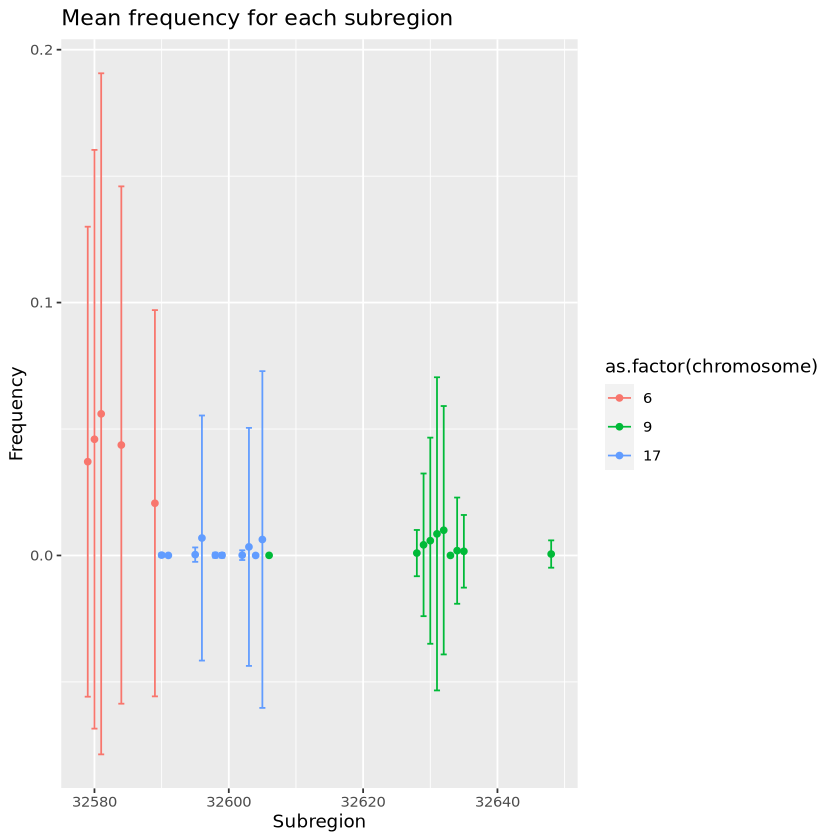

In [20]:
data_mean_frequency<-data_variants_distribution %>%
    group_by(window) %>%
    summarize(mean_fr=mean(allele_frequency), std_fr=sd(allele_frequency), chromosome=max(chromosome))

ggplot(data=data_mean_frequency, aes(x=window, y=mean_fr, color=as.factor(chromosome))) +
    geom_point() +
    geom_errorbar(aes(ymin=mean_fr-std_fr, ymax=mean_fr+std_fr)) +
    labs(title = "Mean frequency for each subregion",
       x = "Subregion",
       y = "Frequency") 

As we would expect, the mean frequencies are higher in the HLA-DRB1 gene, where we have more common variants that dominate the mean. However, the high standard deviations in the HLA-DRB1 suggest the presence of a high number of rare variants. We can verify it by substituting the mean with a more robust centrality parameter, such as for example the median:

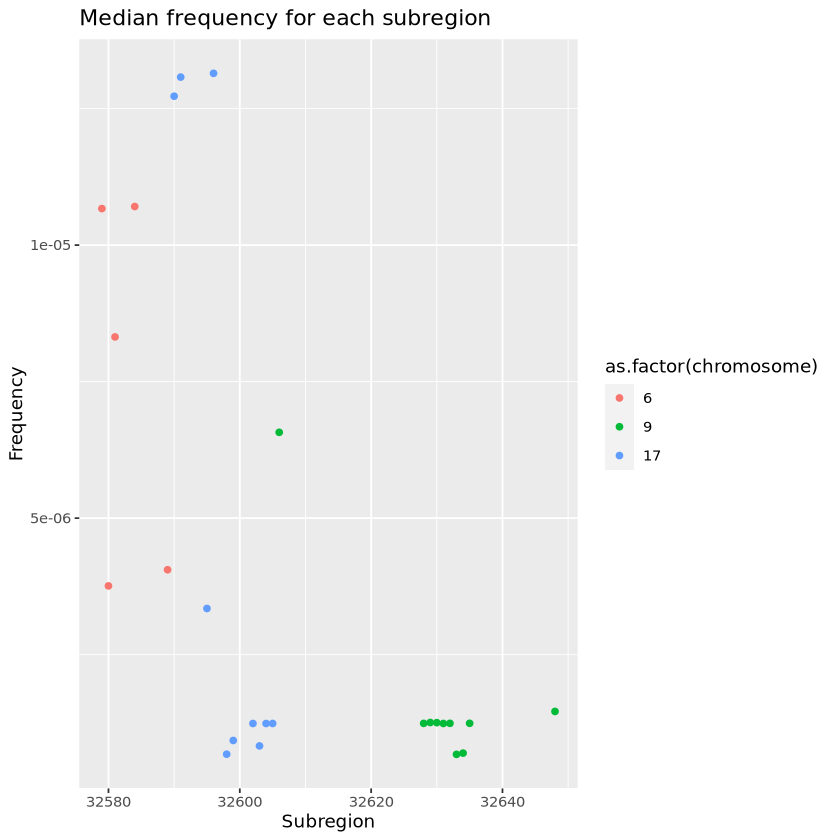

In [21]:
data_median_frequency<-data_variants_distribution %>%
    group_by(window) %>%
    summarize(median_fr=median(allele_frequency), chromosome=max(chromosome))

ggplot(data=data_median_frequency, aes(x=window, y=median_fr, color=as.factor(chromosome))) +
    geom_point() +
    labs(title = "Median frequency for each subregion",
       x = "Subregion",
       y = "Frequency")

The median frequency is always less than $10^{-4}$: this means that common variants, even for the HLA-DRB1 gene where we have many of them, always come together with a higher number of rare variants. There is no region where we have only (or almost only) common variants.

Now we want to see if the frequencies of variants follow a certain distribution. The frequency of a variant can be considered as the probability $p$ to have that variant. So, we can interpret the presence/absence of a variant as a Bernoulli process: we have a probability $p$ to get a 1 (which means presence of the variant) and a probability $1-p$ to get a 0 (which means absence of the variant). According to Bayesian statistics, the prior distribution of $p$ for a Bernoulli process is a Beta distribution. We expect then the frequencies of variants to follow a Beta distribution.

We analyze at first only the common variants for the gene HLA_DRB1:

In [22]:
data_gnomad_HLA_common_variants<-data_gnomad_common_variants %>%
    filter(chromosome==6)

We calculate the expected values of the parameters $\alpha$ and $\beta$ of the Beta distribution (which can be found from the mean and variance of the observations), and use them as an initial guess of the parameters. Then, we do a Beta regression using the Maximum Likelihood Estimation.

In [23]:
m<-mean(data_gnomad_HLA_common_variants$allele_frequency)
v<-var(data_gnomad_HLA_common_variants$allele_frequency)

factor<-(m*(1-m)/v)-1
start_alpha<-m*factor       #these are the two initial guesses of the parameters
start_beta<-factor*(1-m)

#now we do the Beta regression
fit_beta<-fitdistr(data_gnomad_HLA_common_variants$allele_frequency, "beta", start = list(shape1 = start_alpha, shape2 = start_beta))
alpha<-fit_beta$estimate["shape1"]
beta<-fit_beta$estimate["shape2"]
alpha
beta

shape1 
0.8488114

shape2 
4.486217

The estimated parameters are $\alpha=0.85$ and $\beta=4.49$. We can plot a histogram of frequencies and compare it to the Beta function with the estimated parameters:

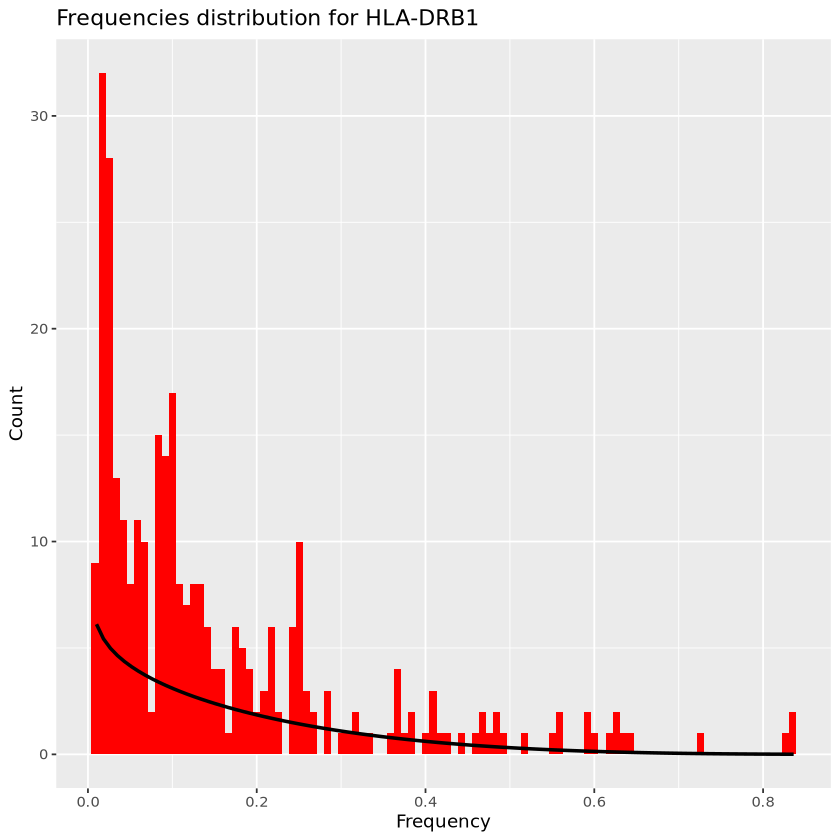

In [24]:
ggplot(data = data_gnomad_HLA_common_variants, aes(x=allele_frequency)) +
    geom_histogram(bins=100, fill="red") +
    stat_function(fun = dbeta, args = list(shape1 = alpha, shape2 = beta), linewidth = 1) +
    labs(title = "Frequencies distribution for HLA-DRB1",
       x = "Frequency",
       y = "Count")

From the plot the Beta distribution seems to describe correctly how the frequencies are distributed. To have a numerical estimation of the goodness of this model, however, we need to do a hypothesis testing. So, we generate a sample of the same size drawn from the Beta distribution with the parameters obtained by the regression. Then we do a Wilcoxon rank-sum test with the null hypothesis that the real frequencies and the sampled frequencies are drawn from the same distribution:

In [25]:
set.seed(75) #we set now the seed for the rest of the code

In [26]:
simulated_frequencies<-rbeta(n=nrow(data_gnomad_HLA_common_variants), shape1 = alpha, shape2=beta)

wilcox.test(data_gnomad_HLA_common_variants$allele_frequency, simulated_frequencies)


	Wilcoxon rank sum test with continuity correction

data:  data_gnomad_HLA_common_variants$allele_frequency and simulated_frequencies
W = 45267, p-value = 0.1305
alternative hypothesis: true location shift is not equal to 0


If we take a significance level of 0.05, then the p-value is bigger than the significance level, and so we can accept the null hypothesis. This means that the frequencies of common variants for the HLA-DRB1 gene follow a Beta distribution with the parameters found before.

If we now consider also the rare variants, and we plot a histogram of frequencies as before, then we have a completely different shape:

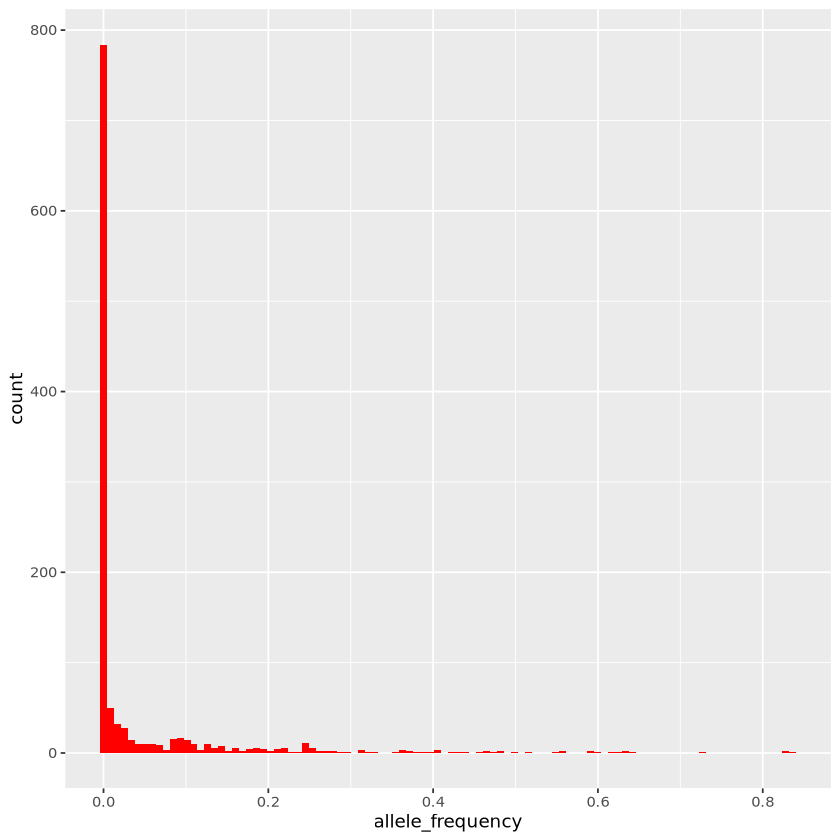

In [27]:
data_gnomad_HLA<-data_gnomad %>% #take both common and rare variants
    filter(chromosome==6)

ggplot(data = data_gnomad_HLA, aes(x=allele_frequency)) +
    geom_histogram(bins=100, fill="red")

The rare variants are much more than the common variants, and so almost all the frequencies are in the first bin of the histogram. We can still try to approximate this histogram to a Beta distribution if we change the parameters:

In [28]:
#same code as before
m<-mean(data_gnomad_HLA$allele_frequency)
v<-var(data_gnomad_HLA$allele_frequency)

factor<-(m*(1-m)/v)-1
start_alpha<-m*factor
start_beta<-factor*(1-m)

fit_beta<-fitdistr(data_gnomad_HLA$allele_frequency, "beta", start = list(shape1 = start_alpha, shape2 = start_beta))
alpha<-fit_beta$estimate["shape1"]
beta<-fit_beta$estimate["shape2"]
alpha
beta

shape1 
0.124854

shape2 
2.754109

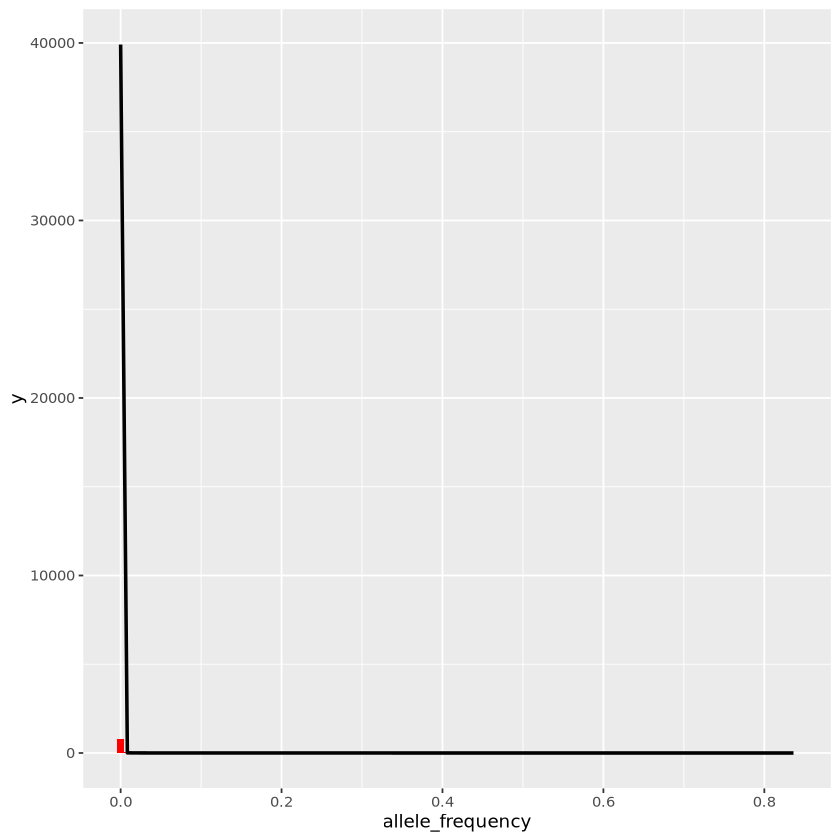

In [29]:
ggplot(data = data_gnomad_HLA, aes(x=allele_frequency)) +
    geom_histogram(bins=100, fill="red") +
    stat_function(fun = dbeta, args = list(shape1 = alpha, shape2 = beta), linewidth = 1)

In [30]:
simulated_frequencies<-rbeta(n=nrow(data_gnomad_HLA), shape1 = alpha, shape2=beta)

wilcox.test(data_gnomad_HLA$allele_frequency, simulated_frequencies)


	Wilcoxon rank sum test with continuity correction

data:  data_gnomad_HLA$allele_frequency and simulated_frequencies
W = 545942, p-value = 1.4e-10
alternative hypothesis: true location shift is not equal to 0


In this case, however, the test tells that the frequencies are probably not drawn from a Beta distribution.

For what concerns the other two genes, we have the same result as for the HLA-DRB1 if we include rare variants, while keeping only common variants we are left with a small statistical sample and so the regression is not reliable.

### 3.3 Allele frequencies in different populations

Now we analyse how the frequencies of variants differ between populations. We draw a plot of the frequencies of all the possible variants in the three genes (labelled by a progressive index), using different colors for different populations.

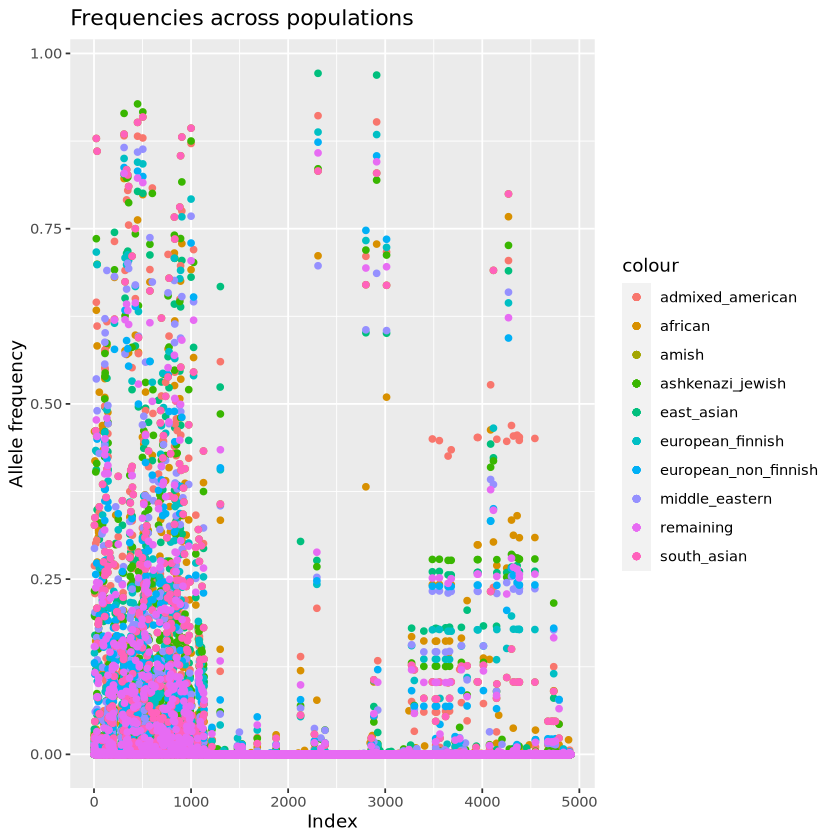

In [31]:
data_histogram_frequencies<-data_gnomad %>%
    mutate(index=row_number()) %>% #labels the variants
    select(index, allele_frequency, allele_frequency_african,
        allele_frequency_east_asian, allele_frequency_admixed_american, allele_frequency_ashkenazi_jewish,
        allele_frequency_european_finnish, allele_frequency_middle_eastern, allele_frequency_european_non_finnish,
        allele_frequency_amish, allele_frequency_south_asian, allele_frequency_remaining
    )

ggplot(data=data_histogram_frequencies, aes(x=index)) +
    geom_point(aes(y=allele_frequency_african, color='african')) +
    geom_point(aes(y=allele_frequency_east_asian, color="east_asian")) +
    geom_point(aes(y=allele_frequency_admixed_american, color="admixed_american")) +
    geom_point(aes(y=allele_frequency_ashkenazi_jewish, color="ashkenazi_jewish")) +
    geom_point(aes(y=allele_frequency_european_finnish, color="european_finnish")) +
    geom_point(aes(y=allele_frequency_middle_eastern, color="middle_eastern")) +
    geom_point(aes(y=allele_frequency_european_non_finnish, color="european_non_finnish")) +
    geom_point(aes(y=allele_frequency_amish, color="amish")) +
    geom_point(aes(y=allele_frequency_amish, color="south_asian")) +
    geom_point(aes(y=allele_frequency_remaining, color="remaining")) +
    labs(title = "Frequencies across populations",
       x = "Index",
       y = "Allele frequency")

From the plot it looks like the frequencies of variants do not differ that much from one population to the other. However, such a plot is very difficult to interpret. It is more useful to study the correlations between frequencies of variants in different populations.

So, we treat the frequencies of all the variants for a certain population as a set of measurements, and then we compute the Pearson correlation coefficients across all couples of populations:

In [32]:
data_correlation<-data_gnomad %>% #select only the columns with the frequencies of populations
    select(allele_frequency_african,
        allele_frequency_east_asian, allele_frequency_admixed_american, allele_frequency_ashkenazi_jewish,
        allele_frequency_european_finnish, allele_frequency_middle_eastern, allele_frequency_european_non_finnish,
        allele_frequency_amish, allele_frequency_south_asian, allele_frequency_remaining
    )

#creates a matrix with the correlations for all the possible couples
correlation_matrix<-cor(data_correlation, method="pearson", use = "pairwise.complete.obs")
correlation_matrix
min(correlation_matrix)

,allele_frequency_african,allele_frequency_east_asian,allele_frequency_admixed_american,allele_frequency_ashkenazi_jewish,allele_frequency_european_finnish,allele_frequency_middle_eastern,allele_frequency_european_non_finnish,allele_frequency_amish,allele_frequency_south_asian,allele_frequency_remaining
allele_frequency_african,1.0000000,0.9258928,0.9390663,0.9504304,0.9269941,0.9685671,0.9184728,0.8780755,0.9459027,0.9438199
allele_frequency_east_asian,0.9258928,1.0000000,0.9625313,0.9553959,0.9379497,0.9562162,0.9497740,0.8999255,0.9567915,0.9690966
allele_frequency_admixed_american,0.9390663,0.9625313,1.0000000,0.9795328,0.9563130,0.9661765,0.9657703,0.8962781,0.9422944,0.9803465
allele_frequency_ashkenazi_jewish,0.9504304,0.9553959,0.9795328,1.0000000,0.9754097,0.9827105,0.9657903,0.9238535,0.9581197,0.9847878
allele_frequency_european_finnish,0.9269941,0.9379497,0.9563130,0.9754097,1.0000000,0.9468372,0.9646193,0.9476096,0.9287898,0.9747716
allele_frequency_middle_eastern,0.9685671,0.9562162,0.9661765,0.9827105,0.9468372,1.0000000,0.9543862,0.8840727,0.9794251,0.9772295
allele_frequency_european_non_finnish,0.9184728,0.9497740,0.9657703,0.9657903,0.9646193,0.9543862,1.0000000,0.9068155,0.9395091,0.9929858
allele_frequency_amish,0.8780755,0.8999255,0.8962781,0.9238535,0.9476096,0.8840727,0.9068155,1.0000000,0.8509824,0.9118889
allele_frequency_south_asian,0.9459027,0.9567915,0.9422944,0.9581197,0.9287898,0.9794251,0.9395091,0.8509824,1.0000000,0.9657789
allele_frequency_remaining,0.9438199,0.9690966,0.9803465,0.9847878,0.9747716,0.9772295,0.9929858,0.9118889,0.9657789,1.0000000


[1] 0.8509824

All Pearson's correlation coefficients between couples of populations are very high (the lowest one is 0.85): this means that we have a strong linear relation between allele frequencies for different populations. We can see this linear relation between, for example, Africans and East Asians in the plot below. 

`geom_smooth()` using formula = 'y ~ x'


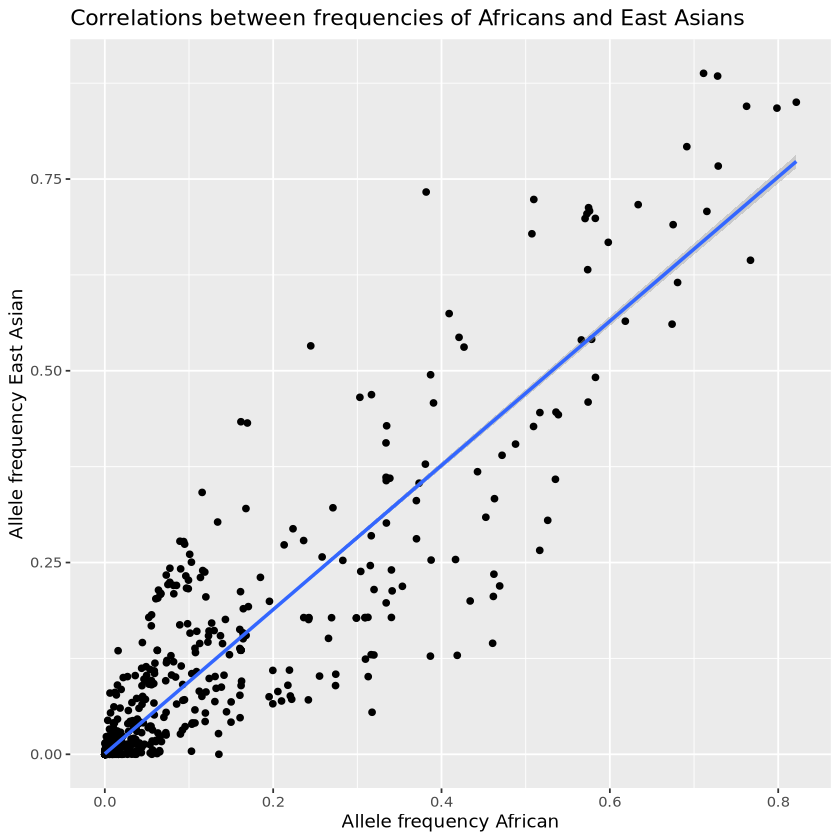

In [33]:
ggplot( data = data_correlation, aes(x = allele_frequency_african, y = allele_frequency_european_finnish) ) +
geom_point( ) +
geom_smooth( method = "lm") +
labs(title = "Correlations between frequencies of Africans and East Asians",
        x = "Allele frequency African",
       y = "Allele frequency East Asian")

From the plot we can see that the linear relation between allele frequencies in different populations is mainly due to common variants. Interestingly, if we consider only rare variants and compute the same correlation coefficients, we get a completely different result:

In [34]:
#same code as above but only for rare variants
data_correlation_rare_variants<-data_gnomad_rare_variants %>%
    select(allele_frequency_african,
        allele_frequency_east_asian, allele_frequency_admixed_american, allele_frequency_ashkenazi_jewish,
        allele_frequency_european_finnish, allele_frequency_middle_eastern, allele_frequency_european_non_finnish,
        allele_frequency_amish, allele_frequency_south_asian, allele_frequency_remaining
    )

correlation_matrix<-cor(data_correlation_rare_variants, method="pearson", use = "pairwise.complete.obs")
correlation_matrix
min(correlation_matrix)

,allele_frequency_african,allele_frequency_east_asian,allele_frequency_admixed_american,allele_frequency_ashkenazi_jewish,allele_frequency_european_finnish,allele_frequency_middle_eastern,allele_frequency_european_non_finnish,allele_frequency_amish,allele_frequency_south_asian,allele_frequency_remaining
allele_frequency_african,1.0000000,0.2757454,0.3579418,0.3809953,0.2811777,0.4416935,0.3691304,0.3978244,0.2103409,0.5742096
allele_frequency_east_asian,0.2757454,1.0000000,0.4598163,0.3561305,0.4640140,0.3241655,0.4929102,0.2897235,0.3280351,0.5832160
allele_frequency_admixed_american,0.3579418,0.4598163,1.0000000,0.5642255,0.5147235,0.4448853,0.6245732,0.3962858,0.3714313,0.6480052
allele_frequency_ashkenazi_jewish,0.3809953,0.3561305,0.5642255,1.0000000,0.5130232,0.6898147,0.7385856,0.4356701,0.5628064,0.7741256
allele_frequency_european_finnish,0.2811777,0.4640140,0.5147235,0.5130232,1.0000000,0.4264630,0.6374003,0.5765780,0.3707682,0.6005452
allele_frequency_middle_eastern,0.4416935,0.3241655,0.4448853,0.6898147,0.4264630,1.0000000,0.6882419,0.3971498,0.6899010,0.7951628
allele_frequency_european_non_finnish,0.3691304,0.4929102,0.6245732,0.7385856,0.6374003,0.6882419,1.0000000,0.5411849,0.6324784,0.8906885
allele_frequency_amish,0.3978244,0.2897235,0.3962858,0.4356701,0.5765780,0.3971498,0.5411849,1.0000000,0.2658341,0.4354120
allele_frequency_south_asian,0.2103409,0.3280351,0.3714313,0.5628064,0.3707682,0.6899010,0.6324784,0.2658341,1.0000000,0.7107878
allele_frequency_remaining,0.5742096,0.5832160,0.6480052,0.7741256,0.6005452,0.7951628,0.8906885,0.4354120,0.7107878,1.0000000


[1] 0.2103409

Considering only rare variants, Pearson correlation coefficients are in general lower. To interpret this result, it is useful to consider the relation between frequencies of variants in Africans and South Asians (where the correlation coefficient takes its lowest value):

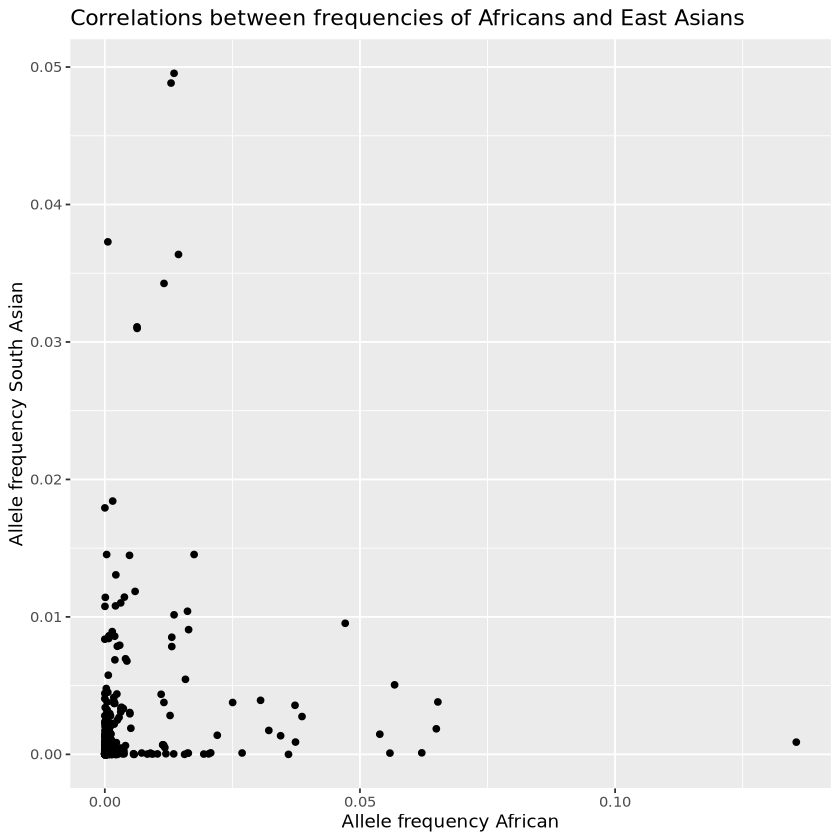

In [35]:
ggplot( data = data_correlation_rare_variants, aes(x = allele_frequency_african, y = allele_frequency_south_asian) ) +
geom_point( ) +
labs(title="Correlations between frequencies of Africans and East Asians",
        x = "Allele frequency African",
       y = "Allele frequency South Asian")

The plot shows clearly that we have specific variants for each population: some rare variants appear in Africans and not in South Asians and viceversa. In conclusion, this analysis shows that we have some variants showing up in all (or almost all) the populations, while other less frequent variants are more common in a specific population. 

## 4. Generation of synthetic haplotypes

In this section we use allele frequency data from gnomAD to generate synthetic haplotypes for the three genes. We only consider the positions with at least one variant (i.e. the positions that are present in the dataset), since we don't have any information about the others.

To simplify the simulation, we represent a position in which we have a variant as a 1 and a position in which we don't have a variant as a 0, without considering which base or group of bases we have at a certain position. However, we have to consider the existance of more variants at the same position:

In [36]:
# count the maximum number of variants we can have at a certain position
count_different_variants<-data_gnomad %>%
    group_by(position) %>%
    summarize(count=n())
    
unique(count_different_variants$count)

[1] 1 2 3 4

We can have up to 4 different variants at the same position. So, we add a column called "variant_number": it is a progressive number which is 1 for the first variant of the position, 2 for the second variant and so on up to 4.

In [37]:
data_gnomad<-data_gnomad %>%
    mutate(variant_number=1L) %>% #L means integer in R
    mutate(variant_number=ifelse(dist_from_previous_variant==0, lag(variant_number)+1L, 1L)) %>%
    mutate(variant_number=ifelse(dist_from_previous_variant==0, lag(variant_number)+1L, 1L)) %>%
    mutate(variant_number=ifelse(dist_from_previous_variant==0, lag(variant_number)+1L, 1L))
#gives an index for each variant at each position. It is always 1 unless we have more than one variant
#at a certain position. We repeat the 'mutate' 4 times because each time it modifies 'variant_number'
#according to the former value of 'variant_number'

While generating the allele in a position with more than one variant, we will have a 0 if we have the reference allele, a 1 if we have the first alternate allele, a 2 if we have the second one and so on.

We generate the haplotypes using the simplest possible model: independent sampling. For each position we have a probability $p_i$ ($i=1,..,K$, where K is the number of variants in that position) to have the $\textit{i-th}$ alternate allele and a probability $p_r=1-\sum_{i=1}^Kp_i$ to have the reference allele. These probabilities are independent from the presence or absence of other variants in the same haplotype.

In practice, for each position we sample a value according to a multinomial Bernoulli distribution with parameters $(p_1,...,p_K,p_r)$. Therefore the parameters follow the conjugated prior distribution of the multinomial Bernoulli distribution, which is the Dirichlet distribution (a multinomial Beta distribution). 

So, for a certain position with N variants we start from a prior Dirichlet distribution with parameters $(\alpha_1,...,\alpha_{K}, \alpha_r)=(1,..,1)$, then we update it following the number of times a certain variant has been observed (given by the column "allele_count" in the gnomAD dataset):

$$
\begin{equation*}
    \alpha_i \rightarrow \alpha_i + AC_i
\end{equation*}\\
\begin{equation*}
    \alpha_r \rightarrow \alpha_r + AN - \sum_{i=1}^KAC_i
\end{equation*}
$$

where $AC_i$ is the "allele_count" for the variant $i$ and $AN$ is the total number of alleles observed (the column "allele_number" in the gnomAD dataset). The total number of alleles observed is different between different variants in the same position, but the difference is negligible compared to the number of observations, so it is not important which one do we choose. The choice of the prior is not very important, too, since we have a huge number of observed alleles (order of $10^5-10^6$), so the choice of a value of 1 for all the prior hyperparameters does not really affect the posterior distribution.

From this posterior distribution we sample the parameters of the multinomial Bernoulli distribution we will use for haplotypes generation of that position. We then repeat this same process for each position.

Now we define a function that takes a gnomAD dataset and generates a dataset containing the N haplotypes.

In [38]:
generate_independent_haplotypes<-function(dataset, N){
    haplotypes_matrix <- matrix(0, nrow = length(unique(dataset$position)), ncol = N) #one allele for each position
    row<-1
    for (pos in unique(dataset$position)){
        variants<-dataset %>%
            filter(position==pos) #the number of rows of "variants" is the number of variants for the position
        parameters_vector<-rep(1, nrow(variants)+1) # +1 to include also variant 0 which is the reference

        for (i in 1:nrow(variants)){
            parameters_vector[i+1]<-1+variants$allele_count[i]
        }
        parameters_vector[1]<-1+max(variants$allele_number)-sum(variants$allele_count)

        #we have updated the parameters and obtained the posterior distribution of the probabilities
        #now we generate the probabilities of the variants

        prob_vector<-rdirichlet(n=1, alpha=parameters_vector)

        #and finally we generate for all the haplotypes the value they take in this position

        haplotypes_matrix_row<-sample.int(n=length(prob_vector), size=N, prob=prob_vector, replace=TRUE)-1
        haplotypes_matrix[row, ]<-haplotypes_matrix_row #put the generated alleles for the position
        #in the corresponding row of the matrix
        
        row<-row+1
    }
    colnames(haplotypes_matrix) <- sprintf("haplotype_%d", seq_len(N)) #give names to the matrix columns

    #now we transform the matrix into a dataset, with position and haplotypes as columns

    synthetic_haplotypes <- tibble(`position`=unique(dataset$position))
    synthetic_haplotypes <- bind_cols(
        synthetic_haplotypes,
        as_tibble(haplotypes_matrix)
    )
    return(synthetic_haplotypes)
}

In this section we only define a function for the generation. We will generate haplotypes only in the next section, choosing the dataset according to the type of analysis we want to perform (for example including only common variants or only a certain population).

We also create a function that gives the frequencies of variants in the generated haplotypes.

In [39]:
get_frequencies<-function(dataset, synthetic_haplotypes){
    frequencies<-rep(0, nrow(dataset))
    row_numbers<-match(dataset$position, synthetic_haplotypes$position)
    #match the positions for the synthetic haplotypes with the positions in the gnomAD dataset, useful since
    #in the gnomAD dataset we have sometimes more than one row per position, while in the synthetic haplotypes
    #only one row per position. "row_numbers" contain the row of the first variant of a position repeated
    #by the number of variants for that position
    
    haplotypes_matrix<-as.matrix(synthetic_haplotypes[,-1])
    rownames(haplotypes_matrix)<-synthetic_haplotypes$position
    #convert the dataset to a matrix, which is much faster in the next part of the code

    for (i in 1:nrow(dataset)){
        variant_number<-dataset$variant_number[i]
        frequencies[i]<-sum(as.integer(haplotypes_matrix[row_numbers[i], ]==variant_number))/length(haplotypes_matrix[row_numbers[i], ])
        #count how many variant allele with that "variant_number" we have and divides by the total number of haplotypes
    }
    return(frequencies)
}

## 5. Variant structure in synthetic data

In this section we compare real and synthetic data. First of all we generate haplotypes considering both common and rare variants, and put the resulting frequencies of variants in the main dataset.

In [40]:
synthetic_haplotypes_HLA<-generate_independent_haplotypes(data_gnomad %>% filter(chromosome==6), 10000)
synthetic_haplotypes_TP53<-generate_independent_haplotypes(data_gnomad %>% filter(chromosome==17), 10000)
synthetic_haplotypes_ABO<-generate_independent_haplotypes(data_gnomad %>% filter(chromosome==9), 10000)
#we generate separately the three genes (useful later) and then we merge them into a single dataset

synthetic_haplotypes<-bind_rows(synthetic_haplotypes_HLA, synthetic_haplotypes_TP53, synthetic_haplotypes_ABO)

data_gnomad$synthetic_frequency<-get_frequencies(data_gnomad, synthetic_haplotypes) #frequencies of variants

### 5.1 Frequencies from real and simulated data

We want to be sure that the model correctly reproduces the frequencies of variants in real data. The easiest way to verify it is to do a linear regression to study the relationship between frequencies in real and simulated data.

In [41]:
linear_relation_real_and_simulated<-lm(synthetic_frequency ~ allele_frequency, data=data_gnomad)
summary(linear_relation_real_and_simulated)


Call:
lm(formula = synthetic_frequency ~ allele_frequency, data = data_gnomad)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.065758  0.000010  0.000012  0.000013  0.028065 

Coefficients:
                   Estimate Std. Error  t value Pr(>|t|)    
(Intercept)      -1.335e-05  4.617e-05   -0.289    0.772    
allele_frequency  9.710e-01  7.286e-04 1332.589   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003178 on 4911 degrees of freedom
Multiple R-squared:  0.9972,	Adjusted R-squared:  0.9972 
F-statistic: 1.776e+06 on 1 and 4911 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


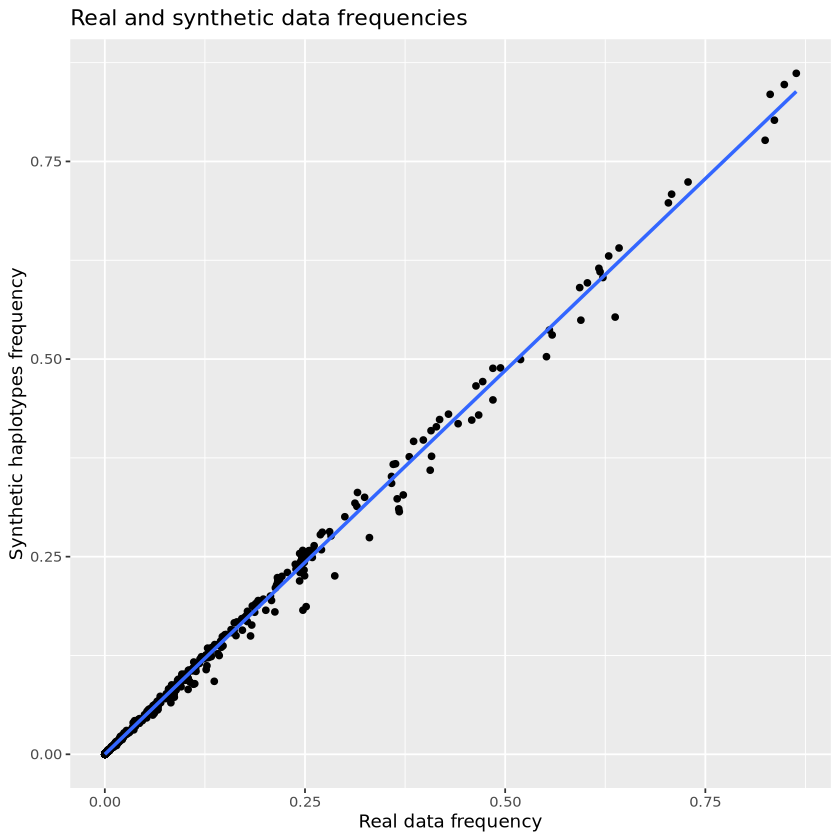

In [42]:
ggplot(data = data_gnomad, aes(x=allele_frequency, y=synthetic_frequency)) +
geom_point( ) +
geom_smooth( method = "lm") +
labs(title= "Real and synthetic data frequencies", 
        x = "Real data frequency",
       y = "Synthetic haplotypes frequency")

From the linear regression model we obtain exactly what we expect: a regression line with a slope of 1 and an intercept of 0. This means that the frequencies of variants are the same in real and simulated data.

If we repeat the same operation, but keeping only frequencies lower than $10^{-4}$, we can see that the linear regression model is completely wrong.

`geom_smooth()` using formula = 'y ~ x'


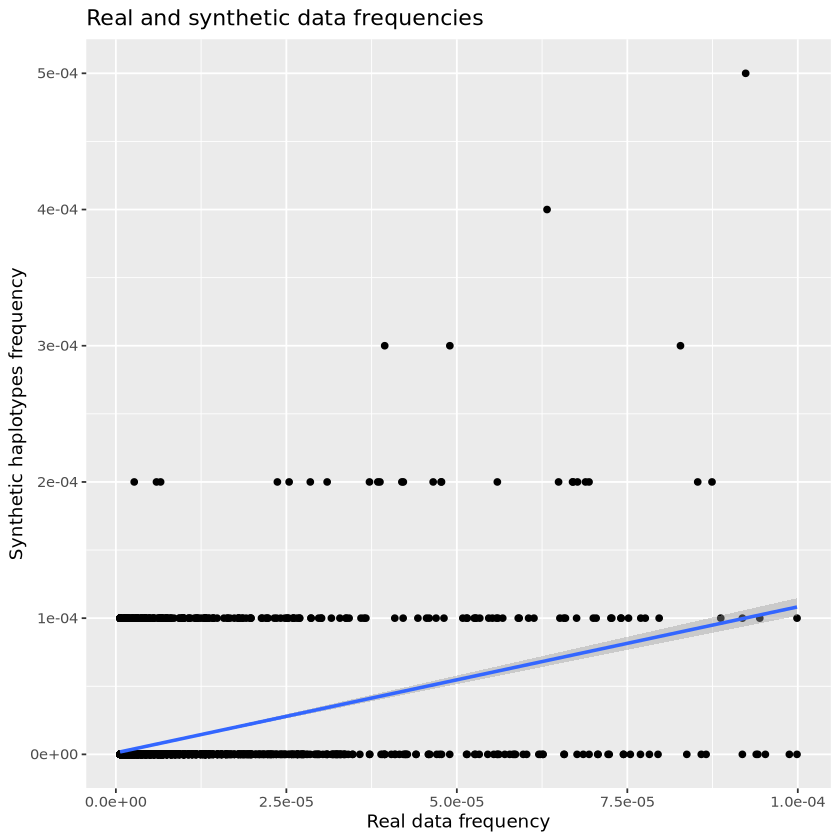

In [43]:
data_gnomad_very_rare<-data_gnomad %>%
    filter(allele_frequency<=0.0001)

#Repeat the same linear regression for the filtered dataset
ggplot(data = data_gnomad_very_rare, aes(x=allele_frequency, y=synthetic_frequency)) +
geom_point( ) +
geom_smooth( method = "lm") +
labs(title= "Real and synthetic data frequencies", 
        x = "Real data frequency",
       y = "Synthetic haplotypes frequency")

The reason for this lies in the number of haplotypes generated. Variants with frequency lower than $10^{-4}$ are unlikely to appear in simulated haplotypes, and if they appear their frequency in synthetic haplotypes is an integer multiple of $10^{-4}$.

The solution to this problem would be to generate a higher number of haplotypes. However, more haplotypes require more time to be generated and occupy more space in memory. In particular, $10^6$ haplotypes (necessary since we have variants with frequencies of order $10^{-6}$) require almost 27 Gb of memory, which is much more than the RAM space of the majority of computers. So, we continue to use $10^4$ haplotypes, but we need to account for this limit in the analysis.

### 5.2 Haplotype diversity

We want to see if our model creates some haplotypes that are more common than the others. To do so, we assign to each haplotype a number that characterizes it. This number is obtained by multiplying the variant number at a certain position of the haplotype by the position number, and then summing all these numbers.

We consider at first only common variants, so we need to generate haplotypes that do not contain rare variants.

In [44]:
synthetic_haplotypes_common_variants<-generate_independent_haplotypes(data_gnomad_common_variants, 10000)
#in this case we don't need to separate by gene

In [45]:
synthetic_haplotypes_diversity_common_variants<-synthetic_haplotypes_common_variants %>%
  mutate(across(-position, ~ .x * position))
#multiplies all variants in the haplotypes by the corresponding position

synthetic_haplotypes_diversity_common_variants <- synthetic_haplotypes_diversity_common_variants %>%
  column_to_rownames("position") %>%  
  t() %>%                              # exchange columns and rows
  as.data.frame() %>%
  rownames_to_column("haplotype") %>%
  mutate(number = rowSums(across(-haplotype), na.rm = TRUE)) %>% #sum over the rows to get a number for each haplotype
  arrange(number) %>% #put numbers in increasing order
  mutate(index=row_number())

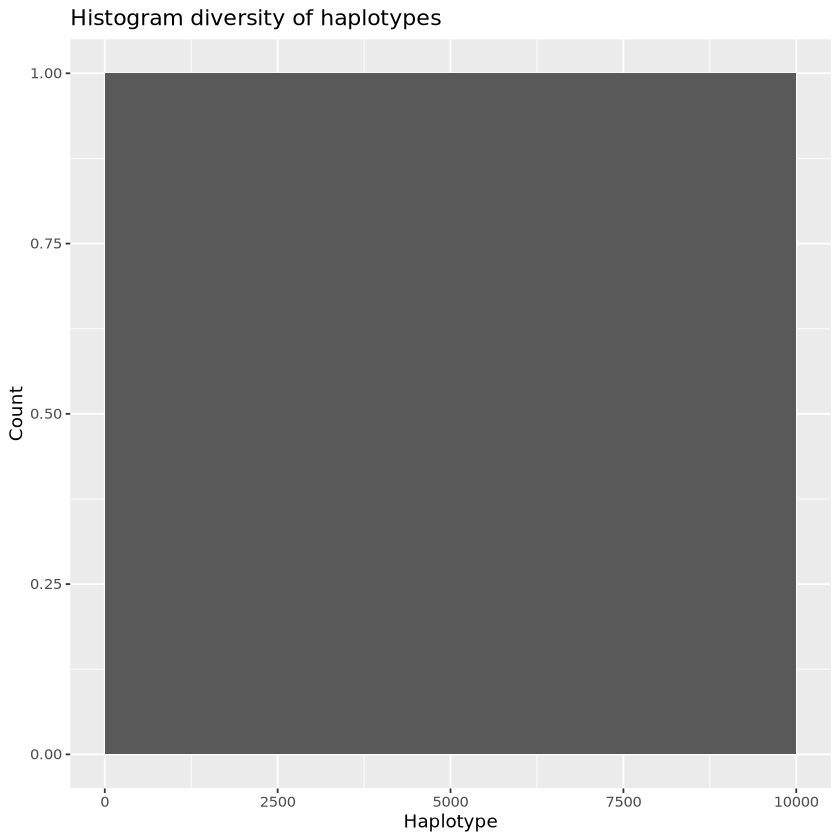

In [46]:
ggplot(data=synthetic_haplotypes_diversity_common_variants, aes(x=index))+
    geom_histogram(bins=10000) +
    labs(title= "Histogram diversity of haplotypes", 
        x = "Haplotype",
       y = "Count")

The histogram shows exactly what we expect to see: since the variant at each position is sampled independently, the probability to have two identical patterns is extremely low. For this reason all the haplotypes are different and we don't have a more frequent pattern.

We drew the histogram considering only common variants, but clearly the result wouldn't change by adding rare variants, since we would only add more variability to the haplotypes, and so the probability to have two identical haplotypes would be even lower.

The histogram only tells that all haplotypes are different, but it does not give any information on how similar is one haplotype to the others. If we want to study the similarity of haplotypes, we can treat them as vectors and calculate the scalar product between all couples of haplotypes.

The contribution of each position to the scalar product between two haplotypes will be 0 if at least one haplotype has the reference allele in that position and 1 or more if both the haplotypes have an alternate allele in that position. So, a high scalar product means that there are many positions in which both haplotypes have an alternate allele.

We calculate a separate scalar product between haplotypes for each gene, to see if we have different results. We keep both common and rare variants, but we only use $10^3$ haplotypes, since using all the haplotypes has a high computational cost. This is not really a limitation, since we will see that we find a quite general result.

In [47]:
dataset_scalar_product<-tibble(
    `distance` = integer(),
    `scalar_product` = integer(), #create the dataset 
    `chromosome` = integer()
    )

list_genes<-list(synthetic_haplotypes_HLA, synthetic_haplotypes_TP53, synthetic_haplotypes_ABO)
list_chromosome<-c(6, 17, 9)
i<-1
#we consider separately the three genes and compute the scalar product for each of them. Then we merge the scalar
#products into a single dataset

for(data in list_genes){
    matrix_haplotypes<-data %>%
        select(haplotype_1:haplotype_1000) #keep the first 1000 haplotypes

    matrix_haplotypes<-as.matrix(matrix_haplotypes) #use a matrix instead of a dataset to compute scalar product since it is faster
    scalar_product<-crossprod(matrix_haplotypes)
    #calculate the scalar product between all couples of haplotypes

    position_1<-rownames(scalar_product)
    position_2<-colnames(scalar_product)

    position_1<-sub(".*_", "", position_1) #remove the word "haplotype" and keep only the number from the row/column names of the matrix
    position_2<-sub(".*_", "", position_2)

    distance_mat <- outer(as.numeric(position_1), as.numeric(position_2), "-")
    #create a matrix with all the possible couples of haplotypes

    dataset_scalar_product_gene<-tibble(
        `distance` = as.vector(distance_mat),
        `scalar_product` = as.vector(scalar_product),
        `chromosome` = rep(list_chromosome[i], length(as.vector(scalar_product)))
    ) #dataset with all the scalar products

    #merge the datasets for different genes
    dataset_scalar_product<-bind_rows(dataset_scalar_product, dataset_scalar_product_gene)
    i<-i+1
}

dataset_scalar_product<-dataset_scalar_product %>%
    filter(distance>0)
#the scalar product between each couple is computed twice. Here we keep only one for each couple.

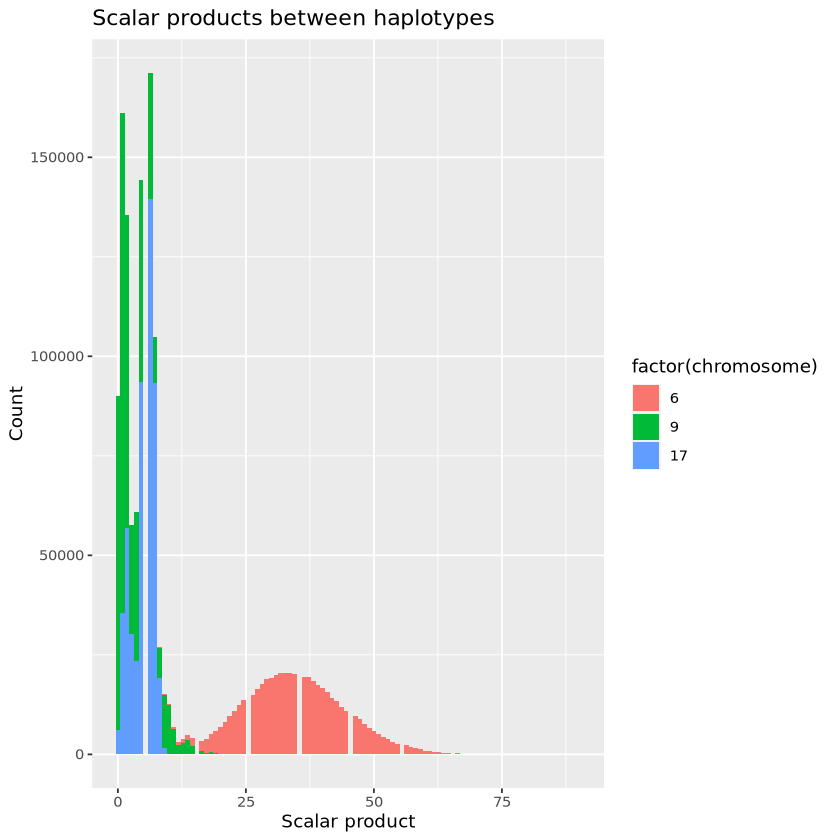

In [48]:
ggplot(data=dataset_scalar_product, aes(x=scalar_product, fill=factor(chromosome))) +
    geom_histogram(bins=100) +
    labs(title= "Scalar products between haplotypes", 
        x = "Scalar product",
       y = "Count")

We notice that the histogram for the HLA-DRB1 gene presents a Gaussian-like shape. Using a quantile-quantile plot, we can verify that the distribution is almost normal, but a bit right-tailed:

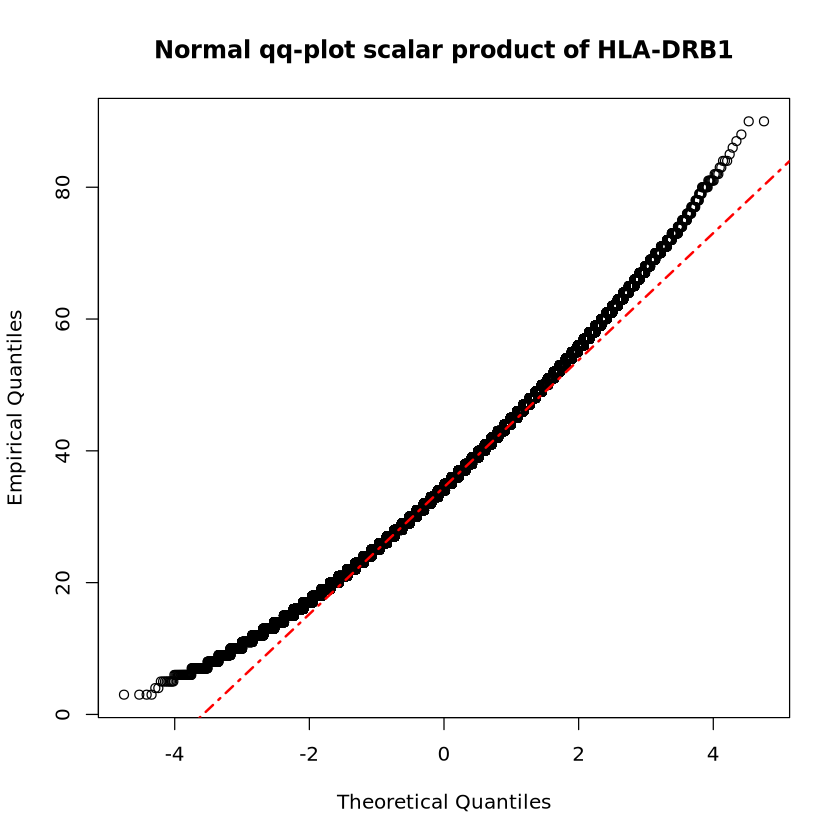

In [49]:
dataset_scalar_product_HLA_DRB1<-dataset_scalar_product %>%
    filter(chromosome==6)

qqnorm(dataset_scalar_product_HLA_DRB1$scalar_product, main = "Normal qq-plot scalar product of HLA-DRB1",
ylab = "Empirical Quantiles",
xlab = "Theoretical Quantiles")

qqline(dataset_scalar_product_HLA_DRB1$scalar_product, col="red", lty=4, lwd=2)

This Gaussian shape for the histogram of the scalar products between couples of haplotypes for the HLA-DRB1 gene is just a result of the probabilistic model used for the generation of haplotypes (independent sampling). Consider for example two haplotypes, and assume for simplicity that every position has only one variant. For a certain position, we have a probability $p$ to have a 1 and a probability $1-p$ to have a 0. This means that the probability to have a contribution of 1 to the scalar product between the two haplotypes is $p^2$ (we need to have 1 for both the haplotypes), while the probability to have a contribution of 0 is $1-p^2$. The same holds for all the other positions (but with different values of $p^2$). So, since the variants at different positions are sampled independently, each scalar product can be seen as the sum of independent random variables, and for the central limit theorem these sums follow a normal distribution. The right skew is given by the fact that $p^2$ is almost always less than 0.5.

The right-skewed Gaussian shape is evident only for the HLA-DRB1 gene because of the high number of common variants. Having almost only rare variants, the distributions of scalar products for TP53 and ABO are extremely right skewed (because $p^2$ is usually less than 0.01), and so the Gaussian-like shape is not visible.

### 5.3 Number of variants per position

We want to see how the variants are distributed along the genes. So, we divide the genes into 1000-bp windows, and count for each haplotype how many variants we have in a window. Then we average over all the haplotypes and see the result.

In this case we only need to know if we have or not a variant in a certain position, without caring about which variant it is (if we have more than one variant for a position).

In [50]:
data_position_window<-data_variants_distribution %>%
#data_variants_distribution has been already divided into 1000bp windows in paragraph 3.2
    group_by(position) %>%
    slice(1) %>% #take one value for each position, we don't want duplicates for the join in the next cell
    ungroup() %>%
    select(position, window, chromosome)

data_window_distribution<-synthetic_haplotypes %>%
    left_join(data_position_window, by="position") %>% #now we have the window corresponding to each position in the haplotypes dataset
    mutate(across(-c("position", "window", "chromosome"), ~ as.integer(.x != 0))) %>%
    #we transform all numbers greater than 1 into 1, we just want to count the total number of variants

    group_by(window) %>%
    summarize(across(-c("position", "chromosome"), ~ sum(.x)), chromosome=max(chromosome)) %>%
    #for each window compute the total number of variants for each haplotype

    mutate(mean_count=rowMeans(across(starts_with("haplotype")))) %>%
    mutate(std=apply(across(starts_with("haplotype")), 1, sd)) #1 means apply over the rows
    #mean value and standard deviation of the number of variants per window (across all haplotypes)

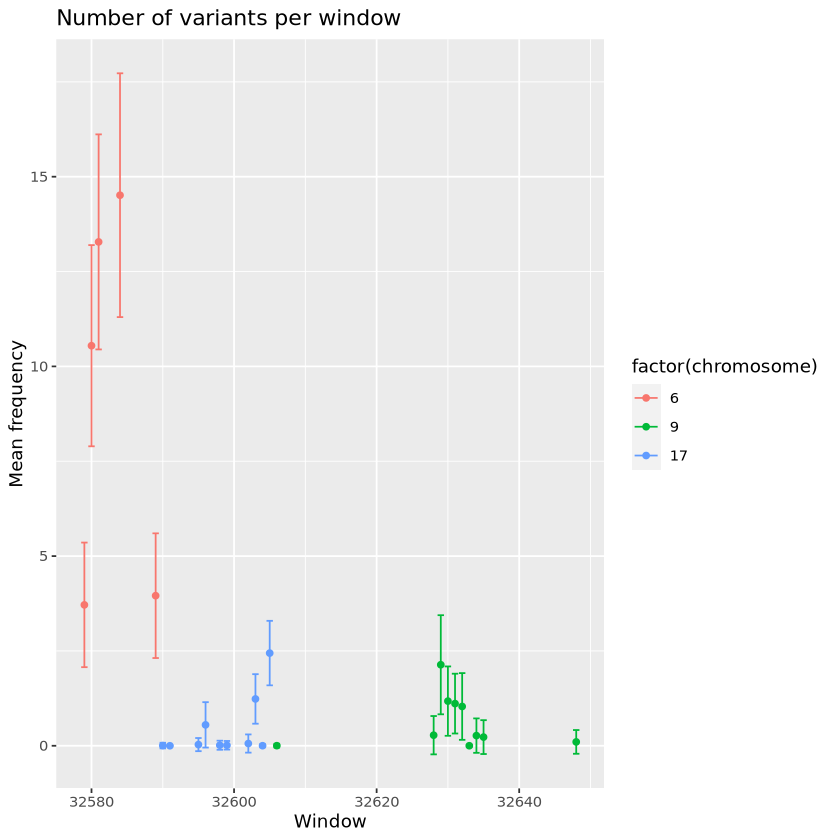

In [51]:
ggplot(data=data_window_distribution, aes(x=window, y=mean_count, color=factor(chromosome))) +
    geom_point() +
    geom_errorbar(aes(ymin=mean_count-std, ymax=mean_count+std)) +
    labs(title= "Number of variants per window", 
        x = "Window",
       y = "Mean frequency")

Almost all variants are concentrated in the HLA-DRB1 gene: this depends again on the abundance of common variants in this gene with respect to the others. We notice that in the TP53 gene we have many windows with a mean near to 0 variant: this is due to the extremely low frequency of many rare variants, which often do not appear at all in the synthetic haplotypes.

### 5.4 Correlation between haplotypes: linkage disequilibrium in haplotypes

We can now compute the linkage disequilibrium coefficient using the synthetic haplotypes. Since LD is defined only when we have just one alternate allele, we generate new haplotypes by taking only the alternate allele with the highest frequency for each position.

In [52]:
data_cv_binary_ABO_AFR<-data_gnomad_common_variants %>%
    filter(chromosome==9) %>%
    group_by(position) %>%
    slice_max(allele_frequency) %>%
    ungroup() %>%
    mutate(allele_count=allele_count_african, allele_number=allele_number_african, allele_frequency=allele_frequency_african)
    #use data for the African population
synthetic_haplotypes_ABO_AFR_cv_binary<-generate_independent_haplotypes(data_cv_binary_ABO_AFR, 10000)

We consider only the common variants of the gene ABO, using the frequencies coming from African population. In this way we can have a comparison with the LD decay obtained in paragraph 1.1.

If we have a set of haplotypes with only 0 and 1 (where 0 indicates the reference allele and 1 the alternate allele), then the $r^2$ between two positions is just the square of the Pearson correlation coefficient between the two samples given by all the values of the two positions across different haplotypes. We can then easily define a function to compute LD coefficients between all couples of positions.

In [53]:
linkage_disequilibrium<-function(dataset){
    data_linkage_haplotypes <- dataset %>%
    column_to_rownames("position") %>%
    t() %>%                              
    as.data.frame() %>%
    rownames_to_column("haplotype") %>%
    select(!haplotype)
    #transposition: now we have positions as columns and haplotypes as rows

    linkage_disequilibrium_matrix<-cor(data_linkage_haplotypes, method="pearson", use="pairwise.complete.obs")
    #matrix with all the correlation coefficients between couples of positions

    position_1<-rownames(linkage_disequilibrium_matrix)
    position_2<-colnames(linkage_disequilibrium_matrix)
    dist_mat <- outer(as.numeric(position_1), as.numeric(position_2), "-")
    #matrix with all the possible couples of positions and their distance

    dataset_linkage_disequilibrium<-tibble(
    `distance` = as.vector(dist_mat),
    `R` = as.vector(linkage_disequilibrium_matrix),
    )#create a dataset with the square root of the LD coefficient in function of the distance

    dataset_linkage_disequilibrium<-dataset_linkage_disequilibrium %>%
    filter(distance>0) %>% #keep each couple of positions only once
    mutate(R2=R^2) # add a column with the LD coefficient

    return(dataset_linkage_disequilibrium)
}

Now we compute the LD coefficients, divide the possible values of distances into bins of 50 bp and then plot the LD decay in function of the mean $r^2$ for each bin:

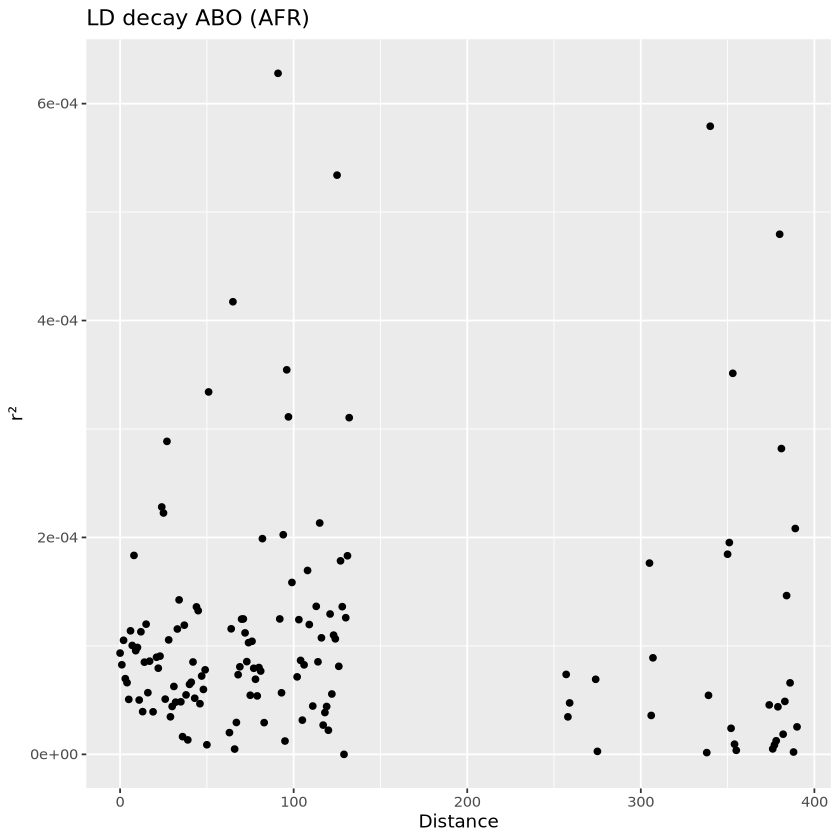

In [54]:
linkage_disequilibrium_ABO_AFR_common_variants<-linkage_disequilibrium(synthetic_haplotypes_ABO_AFR_cv_binary)

linkage_disequilibrium_ABO_AFR_common_variants<-linkage_disequilibrium_ABO_AFR_common_variants %>%
    mutate(dist_bin=as.integer(distance/50)) %>%
    arrange(desc(dist_bin)) %>%
    group_by(dist_bin) %>%
    summarise(R2_mean=mean(R2)) #divide into 50 bp bins and calculate the mean r2

ggplot(data=linkage_disequilibrium_ABO_AFR_common_variants, aes(x=dist_bin, y=R2_mean)) +
    geom_point() +
    labs(x = "Distance", y = "r²",
       title = "LD decay ABO (AFR)")

The LD decay computed using synthetic haplotypes has a completely different plot compared to the LD decay plot from 1000 Genomes Project data. Moreover, the highest value of $r^2$ obtained with synthetic haplotypes is of order $10^{-4}$, which is very small compared to the values obtained from the 1000 Genomes Project. This result can again be explained considering the independent sampling model we used for haplotypes generation: since we sampled each position independently from the others, it is clear that the correlation between the presence/absence of variants at two different positions should be close to 0.

## 6. Discussion and conclusion

In this work we wanted to study the characteristics of data coming from the gnomAD dataset for the genes HLA-DRB1, TP53 and ABO, and see if these data can be used to generate synthetic haplotypes useful to study linkage disequilibrium.

We saw that variants tend to be clustered in some regions into the genes, suggesting that a variant in a position could induce the existence of variants in nearby positions. We then noticed that the HLA-DRB1 gene is the one with the highest number of common variants, although the vast majority of variants in all the three genes is given by rare variants. We also understood the different role of common and rare variants: common variants show in almost all the populations, while rare variants (and in particular variants with frequencies of order $10^{-4}$ or lower) tend to be characteristic of a certain population.

We then used an independent sampling model to generate haplotypes from gnomAD allele frequency data, and then analyzed linkage disequilibrium between couples of positions. What we can say from this work is that, for two main reasons, synthetic haplotypes do not represent a valid alternative to real haplotypes to study linkage disequilibrium.

The first reason is given by the computational cost. As we said, if we simulate a number of haplotypes of order higher than $10^4$ we have issues both with the time required for the simulation and with the memory needed to store the haplotypes (which is more than the RAM capacity of many computers). This is the reason why, for example, in Section 5 we did not generate different haplotypes following frequencies coming from different populations. Indeed, the role of rare variants is negligible if we simulate only $10^4$ haplotypes, and as we said we don't have great differences between populations for what concerns common variants.

However, the computational cost is not really an big issue. We could use for example more compact file formats to store haplotypes, and we could store them on the hard disk instead of using the RAM, and then repeat many times the analysis on different subgroups of haplotypes, and store in the RAM only the haplotypes for that subgroup. This process requires time, but in principle it can be done.

The real problem in simulating haplotypes using gnomAD frequencies of variants is that the results are completely dependent from the model chosen for the generation. We saw it both in the distribution of the scalar products between haplotypes for the gene HLA-DRB1 and in the LD decay: the results follow from the assumption of complete independence between variants at different positions.

Clearly an independent sampling model is not suitable to describe variants in the DNA, since it completely eliminates relations between nearby variants. Choosing a different model, however, wouldn't give a better result. Indeed, we need in any case to make some assumptions, and the linkage disequilibrium coefficients we obtain are just the result of those assumptions. This means that, even if we use a probabilistic model that approximates real linkage disequilibrium, it would not be able to give new results that we haven't already put in the model.

Moreover, the choice of the model is not a trivial issue. In the Introduction we saw that the LD decay for the ABO gene is exponential, but if we consider for example the HLA-DRB1 gene we get a decay which is clearly different from an exponential: the LD coefficient seems to decay until we reach a certain distance, then it starts growing again.

Rows: 257403 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): SNP_A, SNP_B
dbl (5): CHR_A, BP_A, CHR_B, BP_B, R2
lgl (1): X8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


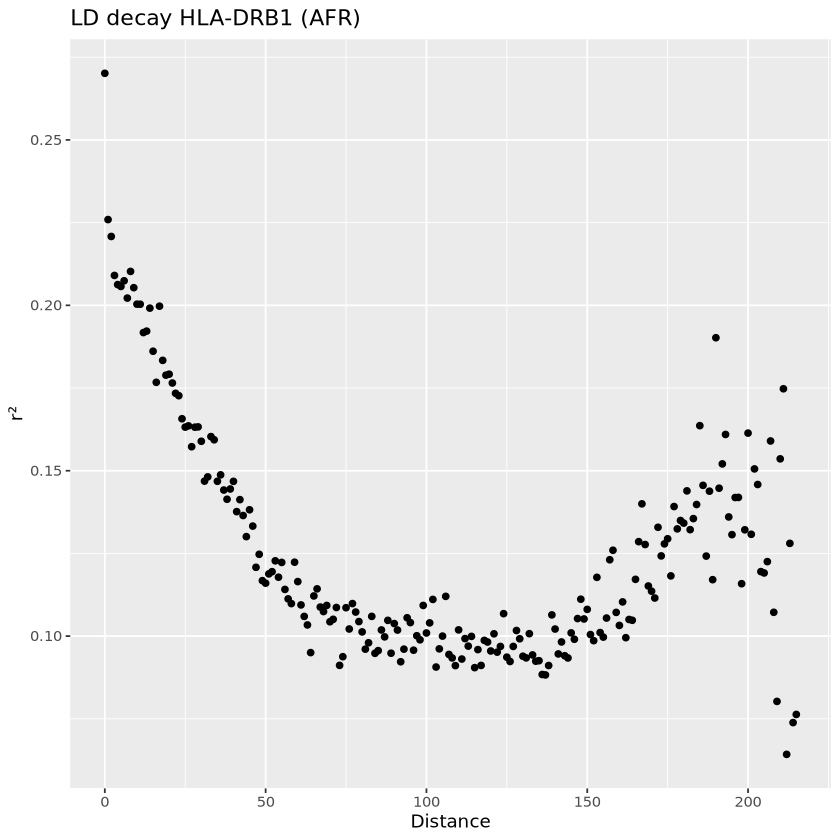

In [55]:
ld_HLA_DRB1<-read_csv(
    "linkage_disequilibrium_csv/HLA-DRB1_AFR_LD.csv"
)

ld_decay_HLA_DRB1<-ld_HLA_DRB1 %>%
  mutate(dist_bp=abs(BP_A - BP_B)) %>%
  mutate(dist_bin=as.integer(dist_bp/50)) %>% #divide the distances into bins of 50 bp
  arrange(desc(dist_bin)) %>%
  group_by(dist_bin) %>%
  summarise(R2_mean=mean(R2), chromosome=max(CHR_A)) #calculate the mean value of R2 for each bin

#plot LD decay
ggplot(ld_decay_HLA_DRB1, aes(x = dist_bin, y = R2_mean)) +
  geom_point() +
  labs(x = "Distance", y = "r²",
       title = "LD decay HLA-DRB1 (AFR)")

In conclusion, we cannot fully solve the lack of a huge quantity of real haplotypes with the simulation of synthetic haplotypes, expecially if we generate them considering only variants frequencies without any knowledge of the co-occurrence of variants. To build realistic synthetic haplotypes we would need a good model of linkage disequilibrium, which we can only obtain by studying real haplotypes.

## 7. References



[1] VanLiere J. M., Rosenberg N. A., *Mathematical properties of the r2 measure of linkage disequilibrium*, Theoretical Population Biology 74 (2008) 130–137

[2] The International HapMap Consortium. The International HapMap Project. Nature 426, 789–796 (2003)

[3] The 1000 Genomes Project Consortium. A global reference for human genetic variation. Nature 526, 68–74 (2015)

[4] Slatkin M., *Linkage disequilibrium--understanding the evolutionary past and mapping the medical future*. Nat Rev Genet. 2008 Jun

[5] Adrian Tan, Gonçalo R. Abecasis, Hyun Min Kang, *Unified representation of genetic variants*, Bioinformatics, Volume 31, Issue 13, July 2015, Pages 2202–2204

[6] Karczewski, K.J., Francioli, L.C., Tiao, G. et al. *The mutational constraint spectrum quantified from variation in 141,456 humans*. Nature 581, 434–443 (2020).